# ReCell Project

## Background

Buying and selling used smartphones used to be something that happened on a handful of online marketplace sites. But the used and refurbished phone market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth $52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used smartphones that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing a smartphone. There are plenty of other benefits associated with the used smartphone market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished smartphones. Maximizing the longevity of mobile phones through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost the cheaper refurbished smartphone segment, as consumers cut back on discretionary spending and buy phones only for immediate needs. ReCell is a startup aiming to tap the potential in this market.

## Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished smartphones. The objective is to analyze the data provided and build a linear regression model to predict the price of a used phone and identify factors that significantly influence it.

## Data description

1. brand_name: Name of manufacturing brand
2. os: OS on which the phone runs
3. screen_size: Size of the screen in cm
4. 4g: Whether 4G is available or not
5. 5g: Whether 5G is available or not
6. main_camera_mp: Resolution of the rear camera in megapixels
7. selfie_camera_mp: Resolution of the front camera in megapixels
8. int_memory: Amount of internal memory (ROM) in GB
9. ram: Amount of RAM in GB
10. battery: Energy capacity of the phone battery in mAh
11. weight: Weight of the phone in grams
12. release_year: Year when the phone model was released
13. days_used: Number of days the used/refurbished phone has been used
14. new_price: Price of a new phone of the same model in euros
15. used_price: Price of the used/refurbished phone in euros
 

### Import necessary libraries

In [2]:
# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

<IPython.core.display.Javascript object>

### Read dataset

In [19]:
# loading the dataset
data1 = pd.read_csv("used_phone_data.csv")

<IPython.core.display.Javascript object>

In [20]:
# copying data to another varaible to avoid any changes to original data
data = data1

# looking at head (first 5 observations)
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
0,Honor,Android,23.97,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,86.96
1,Honor,Android,28.10,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,161.49
2,Honor,Android,24.29,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,268.55
3,Honor,Android,26.04,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,180.23
4,Honor,Android,15.72,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,103.80


<IPython.core.display.Javascript object>

### Shape of dataset

In [21]:
data.shape

(3571, 15)

<IPython.core.display.Javascript object>

There are 3571 rows and 15 columns

### Check the info()

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3571 non-null   object 
 1   os                3571 non-null   object 
 2   screen_size       3571 non-null   float64
 3   4g                3571 non-null   object 
 4   5g                3571 non-null   object 
 5   main_camera_mp    3391 non-null   float64
 6   selfie_camera_mp  3569 non-null   float64
 7   int_memory        3561 non-null   float64
 8   ram               3561 non-null   float64
 9   battery           3565 non-null   float64
 10  weight            3564 non-null   float64
 11  release_year      3571 non-null   int64  
 12  days_used         3571 non-null   int64  
 13  new_price         3571 non-null   float64
 14  used_price        3571 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 418.6+ KB


<IPython.core.display.Javascript object>

* Some columns have missing values

## EDA

### Univariate Analysis

In [23]:
# This function takes the numerical column as the input and returns the boxplots
# and histograms for the variable.


def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots

    p = sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="red"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        np.mean(feature), color="g", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        np.median(feature), color="black", linestyle="-"
    )  # Add median to the histogram
    plt.show()

<IPython.core.display.Javascript object>

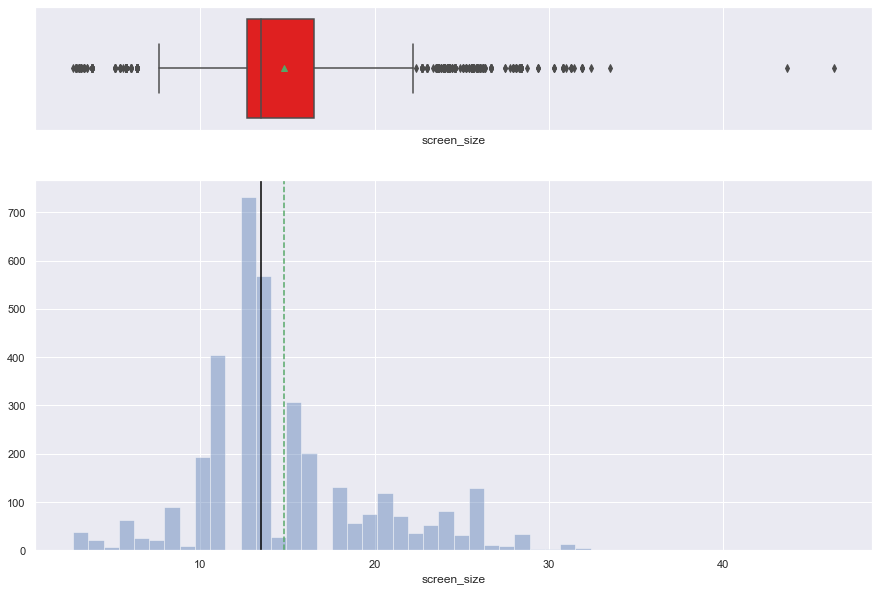

<IPython.core.display.Javascript object>

In [24]:
histogram_boxplot(data["screen_size"])

* screen_size is right slightly right skewed and has outliers

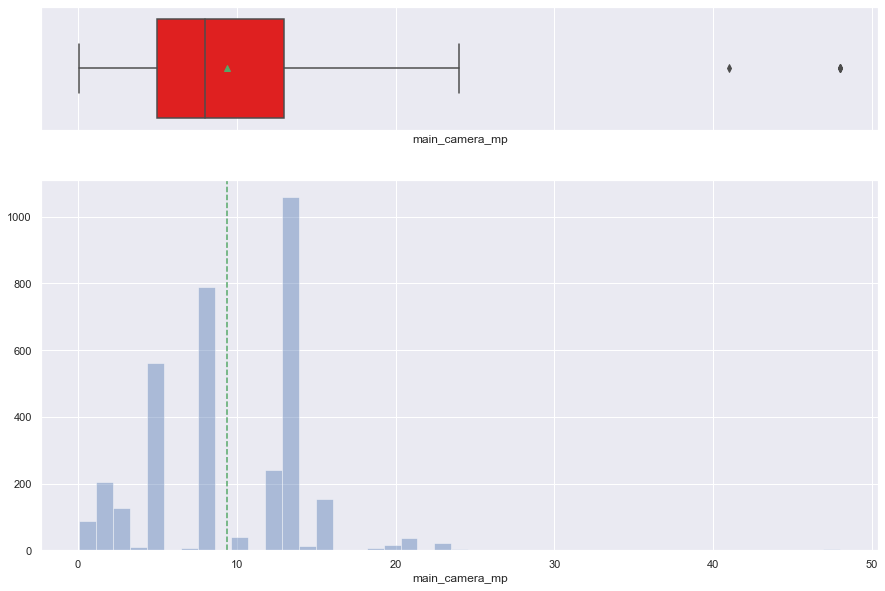

<IPython.core.display.Javascript object>

In [25]:
histogram_boxplot(data["main_camera_mp"])

* Right skewed with very few outliers.

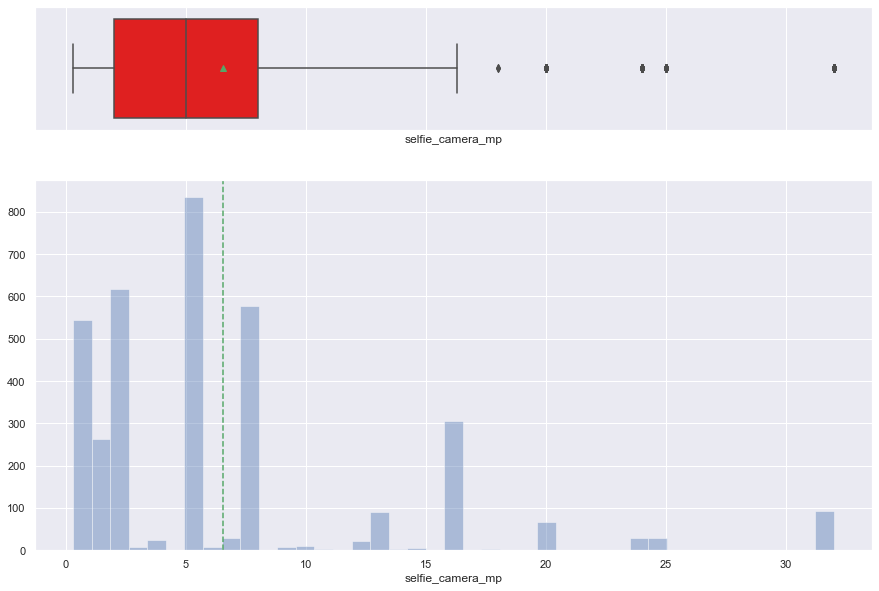

<IPython.core.display.Javascript object>

In [107]:
histogram_boxplot(data["selfie_camera_mp"])

* Right skewed with few outliers.

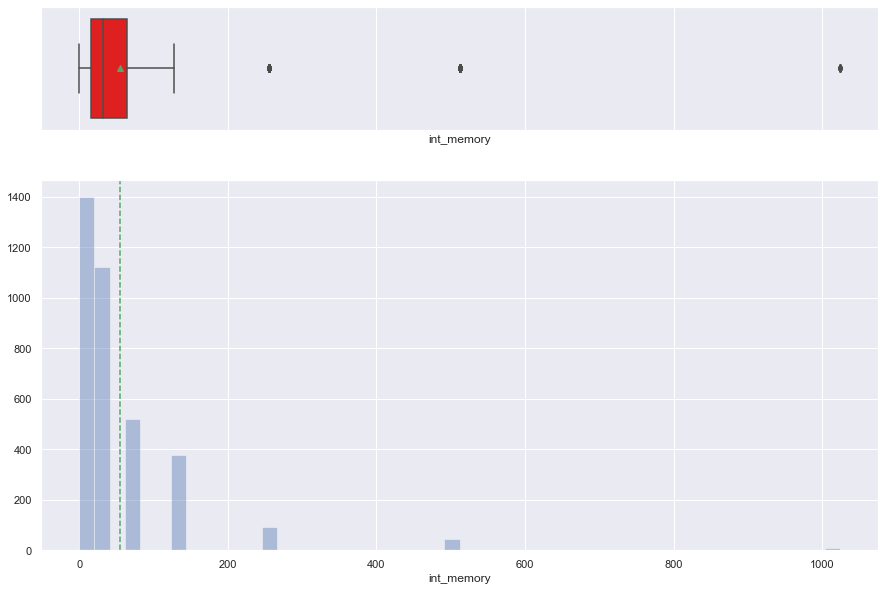

<IPython.core.display.Javascript object>

In [26]:
histogram_boxplot(data["int_memory"])

* int_memory is right skewed ( few outlieres) and has discrete values

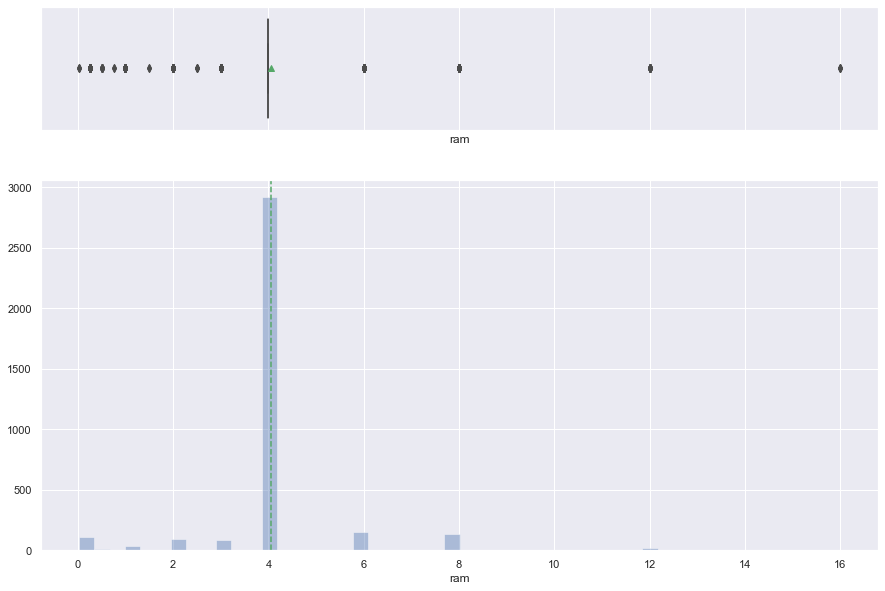

<IPython.core.display.Javascript object>

In [27]:
histogram_boxplot(data["ram"])

* ram also has discrete values.

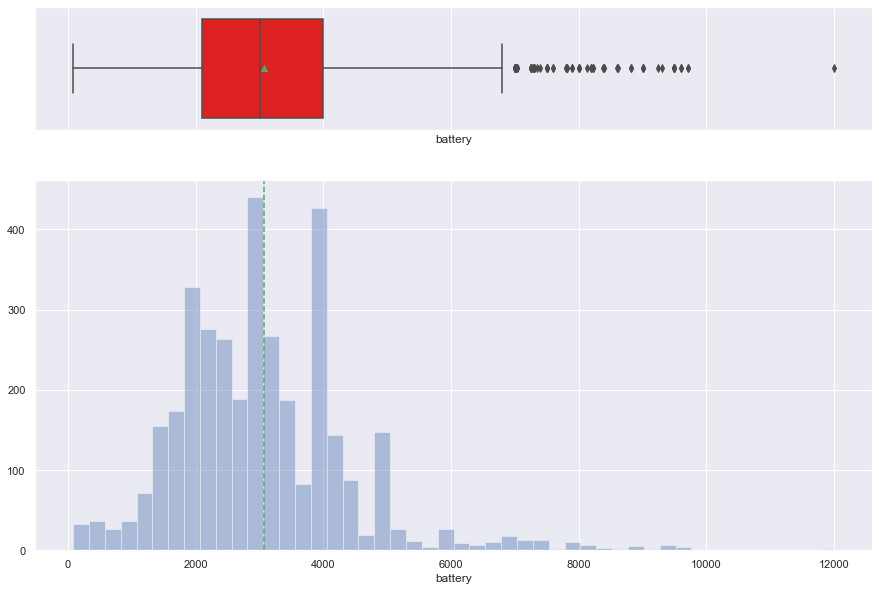

<IPython.core.display.Javascript object>

In [28]:
histogram_boxplot(data["battery"])

* battery has many outliers.

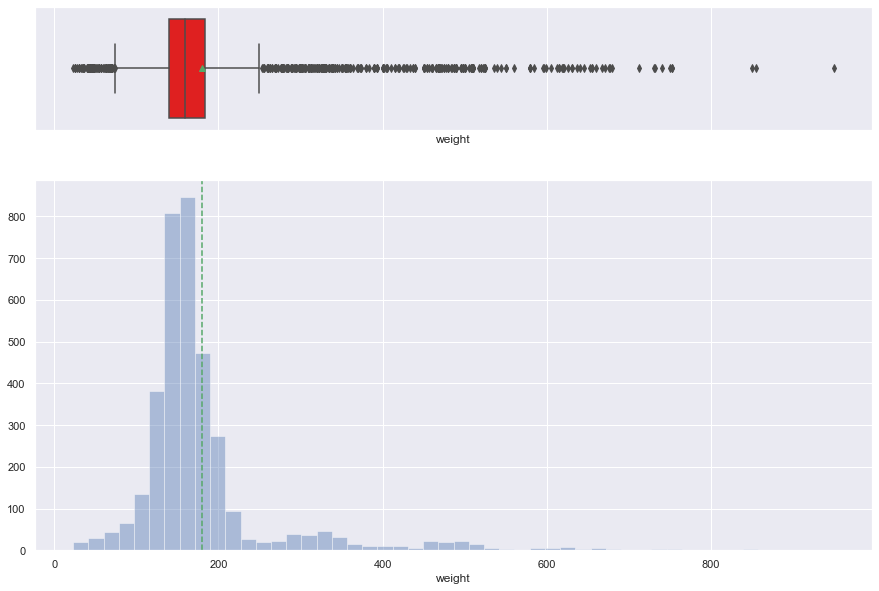

<IPython.core.display.Javascript object>

In [29]:
histogram_boxplot(data["weight"])

* weight has too many outliers and highly right skewed

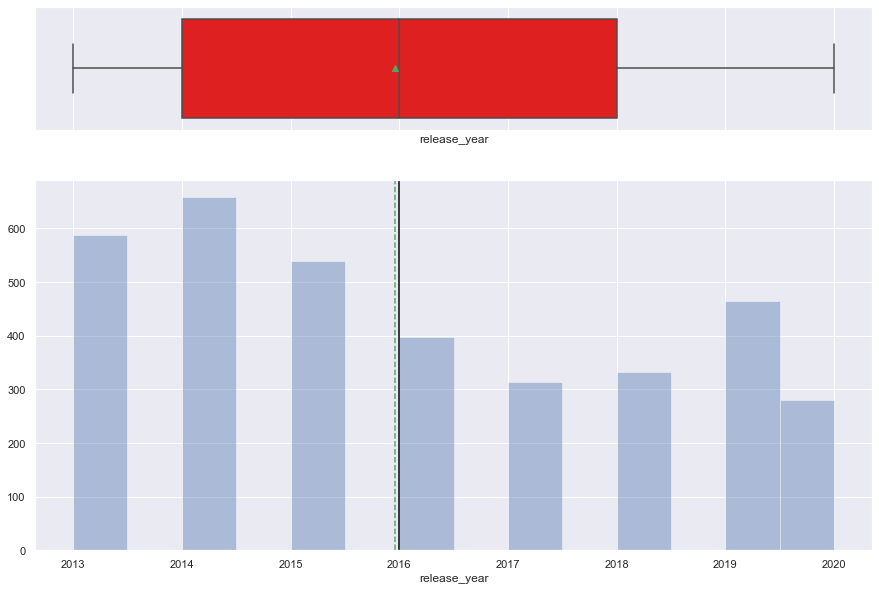

<IPython.core.display.Javascript object>

In [30]:
histogram_boxplot(data["release_year"])

* less number of phones were made from 2016-2017

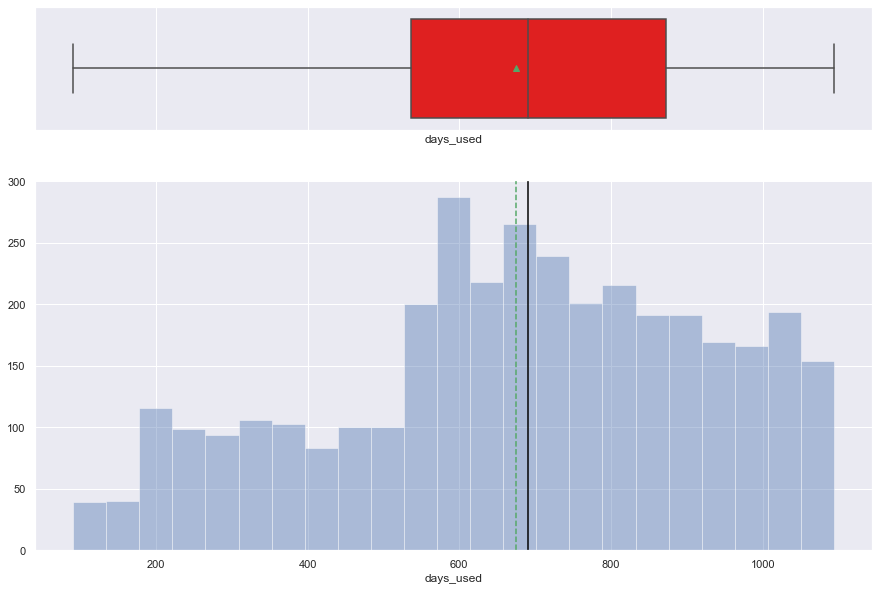

<IPython.core.display.Javascript object>

In [31]:
histogram_boxplot(data["days_used"])

* phones have been used fromm about 100-1100 days

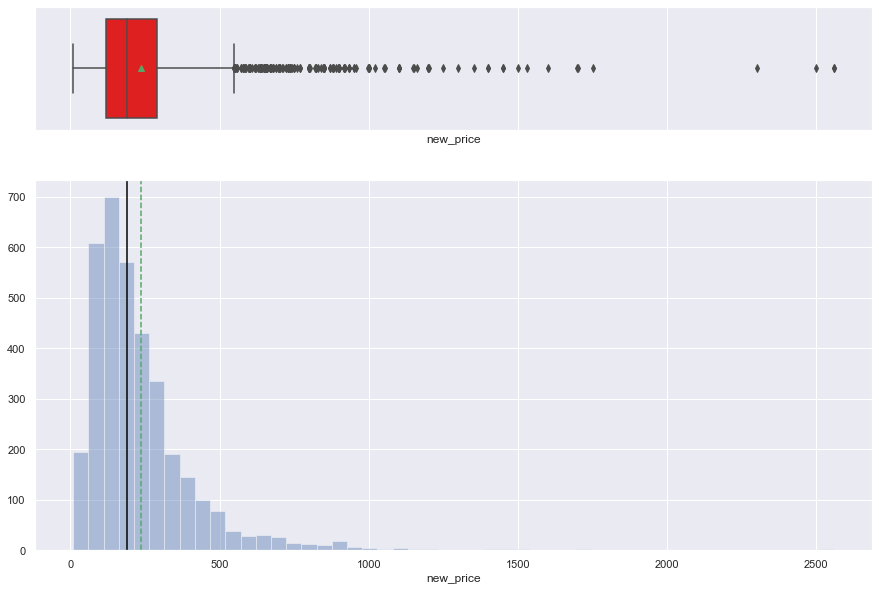

<IPython.core.display.Javascript object>

In [32]:
histogram_boxplot(data["new_price"])

* new_price has many outliers and highly right skewed

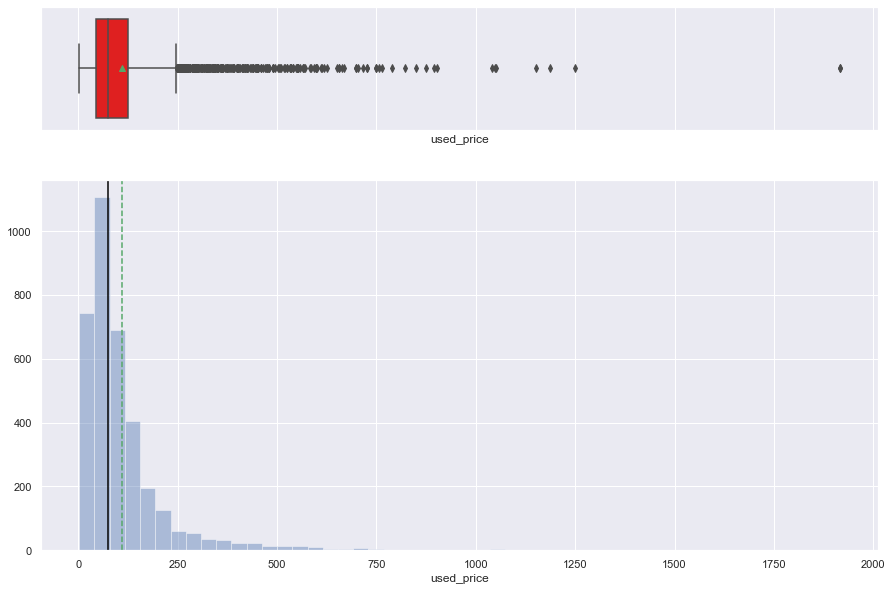

<IPython.core.display.Javascript object>

In [33]:
histogram_boxplot(data["used_price"])

* used_price has many outliers and highly right skewed

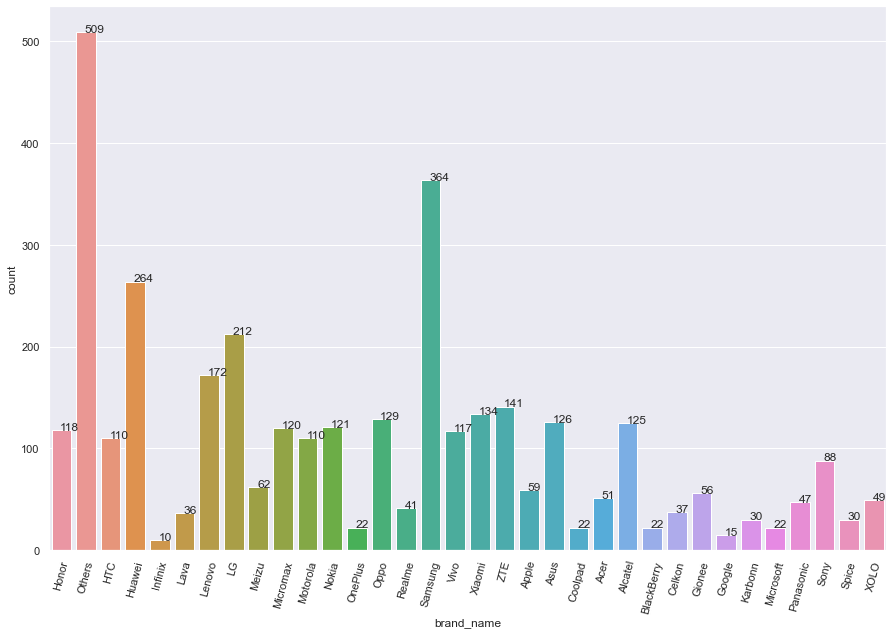

<IPython.core.display.Javascript object>

In [34]:
plt.figure(figsize=(15, 10))
plt.xticks(rotation=75)
ax = sns.countplot(data["brand_name"])

total = len(data["brand_name"])  # length of the column
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
    y = p.get_y() + p.get_height()  # hieght of the plot
    ax.annotate(p.get_height(), (x, y), size=12)  # annotate the count

* Apart from unknown brands, the most common brand in the market is Samsung.

**What percentage of the used phone market is dominated by Android devices?**

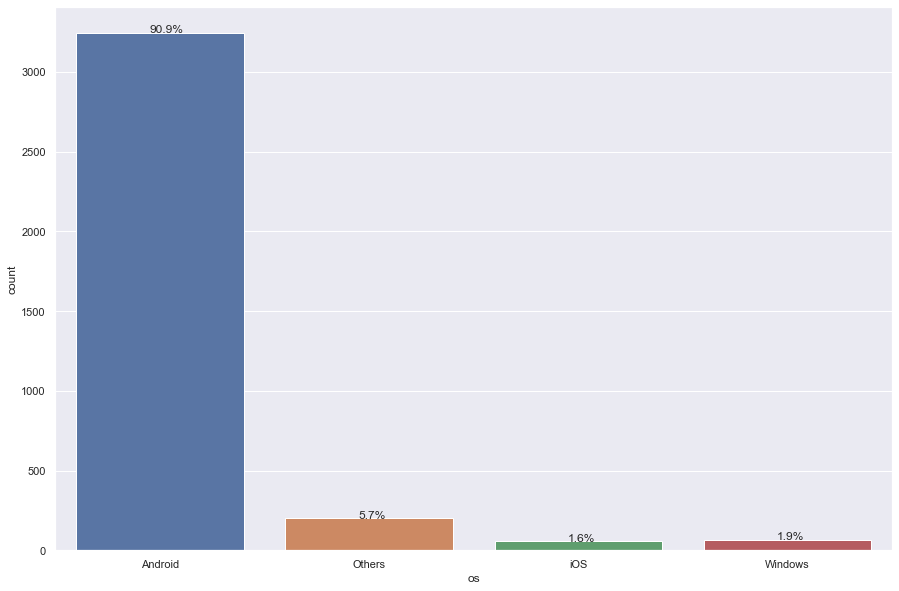

<IPython.core.display.Javascript object>

In [35]:
plt.figure(figsize=(15, 10))
plt.xticks(rotation=0)
ax = sns.countplot(data["os"])

total = len(data["os"])  # length of the column
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
    y = p.get_y() + p.get_height()  # hieght of the plot
    percent = round(p.get_height() / total * 100, 2)
    ax.annotate("{:.1f}%".format(percent), (x, y), size=12)  # annotate the count

* 90.9% of phone market is dominated by Android users.

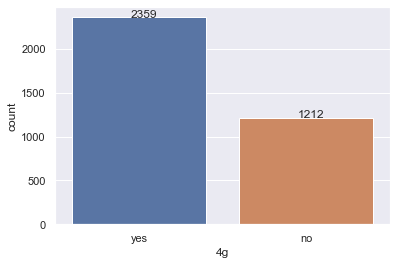

<IPython.core.display.Javascript object>

In [36]:
ax = sns.countplot(data["4g"])

total = len(data["4g"])  # length of the column
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
    y = p.get_y() + p.get_height()  # hieght of the plot
    ax.annotate(p.get_height(), (x, y), size=12)  # annotate the count

* About half the phones don't have 4G

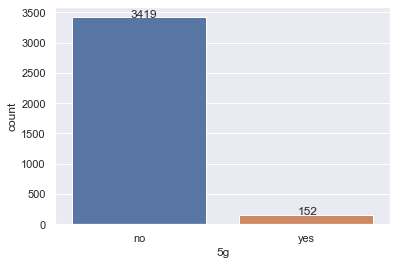

<IPython.core.display.Javascript object>

In [37]:
ax = sns.countplot(data["5g"])

total = len(data["5g"])  # length of the column
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
    y = p.get_y() + p.get_height()  # hieght of the plot
    ax.annotate(p.get_height(), (x, y), size=12)  # annotate the count

* Only 152 phones have 5G

### Bivariate Analysis

<AxesSubplot:>

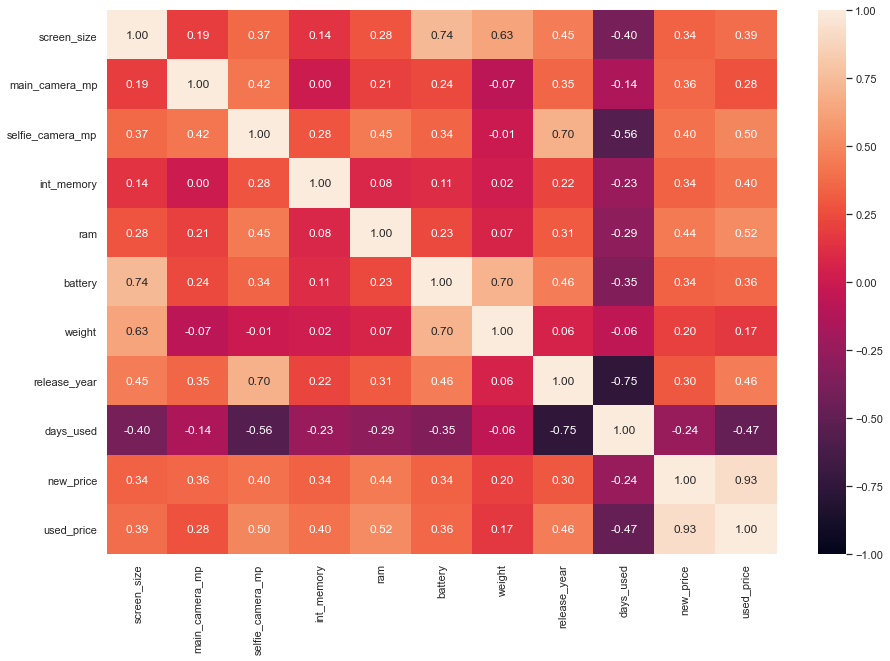

<IPython.core.display.Javascript object>

In [38]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f")

**Observations**
* used_price has high positive correlation with new_price
* days_used has a high negative correlation with release_year
* high positive correlations exist between battery & screen_size, battery & weight
* days_used has a negative correlation with all other variables

**The amount of RAM is important for the smooth functioning of a phone. How does the amount of RAM vary with the brand?**

In [39]:
data.groupby("brand_name")["ram"].mean()

brand_name
Acer          3.901961
Alcatel       3.426000
Apple         4.000000
Asus          4.047619
BlackBerry    3.829545
Celkon        1.466216
Coolpad       3.954545
Gionee        3.933036
Google        4.533333
HTC           4.000000
Honor         4.593220
Huawei        4.641326
Infinix       2.600000
Karbonn       3.375000
LG            3.893868
Lava          3.277778
Lenovo        3.886628
Meizu         4.451613
Micromax      3.750000
Microsoft     4.000000
Motorola      3.945455
Nokia         3.601351
OnePlus       6.363636
Oppo          4.961240
Others        3.751041
Panasonic     4.000000
Realme        4.195122
Samsung       4.159341
Sony          4.068182
Spice         3.750000
Vivo          4.756410
XOLO          4.000000
Xiaomi        4.567164
ZTE           4.023050
Name: ram, dtype: float64

<IPython.core.display.Javascript object>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 [Text(0, 0, 'Honor'),
  Text(1, 0, 'Others'),
  Text(2, 0, 'HTC'),
  Text(3, 0, 'Huawei'),
  Text(4, 0, 'Infinix'),
  Text(5, 0, 'Lava'),
  Text(6, 0, 'Lenovo'),
  Text(7, 0, 'LG'),
  Text(8, 0, 'Meizu'),
  Text(9, 0, 'Micromax'),
  Text(10, 0, 'Motorola'),
  Text(11, 0, 'Nokia'),
  Text(12, 0, 'OnePlus'),
  Text(13, 0, 'Oppo'),
  Text(14, 0, 'Realme'),
  Text(15, 0, 'Samsung'),
  Text(16, 0, 'Vivo'),
  Text(17, 0, 'Xiaomi'),
  Text(18, 0, 'ZTE'),
  Text(19, 0, 'Apple'),
  Text(20, 0, 'Asus'),
  Text(21, 0, 'Coolpad'),
  Text(22, 0, 'Acer'),
  Text(23, 0, 'Alcatel'),
  Text(24, 0, 'BlackBerry'),
  Text(25, 0, 'Celkon'),
  Text(26, 0, 'Gionee'),
  Text(27, 0, 'Google'),
  Text(28, 0, 'Karbonn'),
  Text(29, 0, 'Microsoft'),
  Text(30, 0, 'Panasonic'),
  Text(31, 0, 'Sony'),
  Text(32, 0, 'Spice'),
  Text(33, 0, 'XOLO')])

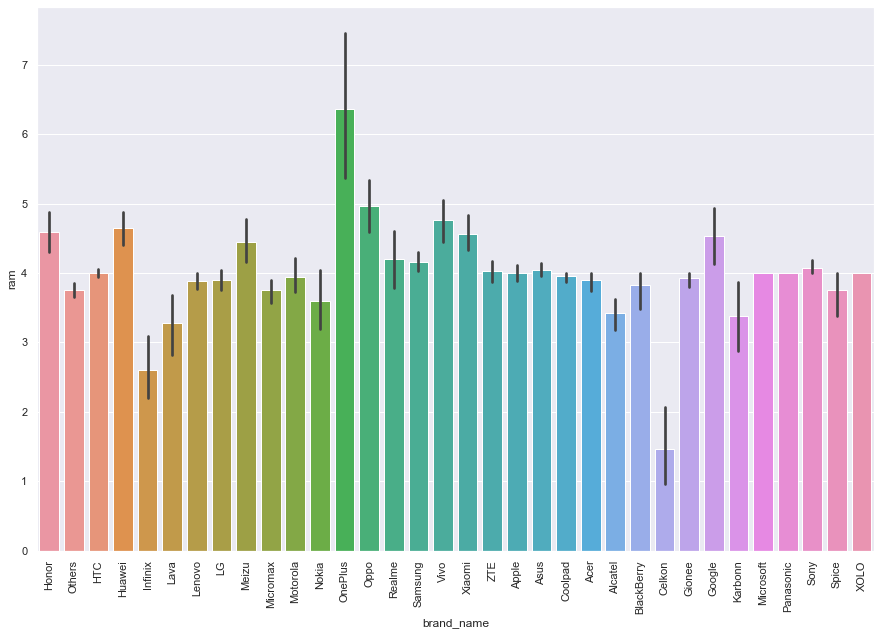

<IPython.core.display.Javascript object>

In [40]:
plt.figure(figsize=(15, 10))

sns.barplot(data=data, y="ram", x="brand_name")
plt.xticks(rotation=90)

Most of the phones have ram > 4GB

**A large battery often increases a phone's weight, making it feel uncomfortable in the hands. How does the weight vary for phones offering large batteries (more than 4500 mAh)?**

In [41]:
data_battery = data[data["battery"] > 4500]
data_battery.groupby("battery")["weight"].mean()

battery
4520.0     206.500000
4550.0     290.500000
4600.0     348.987500
4680.0     244.000000
4700.0     310.200000
              ...    
9300.0     637.000000
9500.0     743.033333
9600.0     784.500000
9720.0     636.000000
12000.0     23.000000
Name: weight, Length: 74, dtype: float64

<IPython.core.display.Javascript object>

(array([  0., 100., 200.]), [])

<Figure size 3600x1080 with 0 Axes>

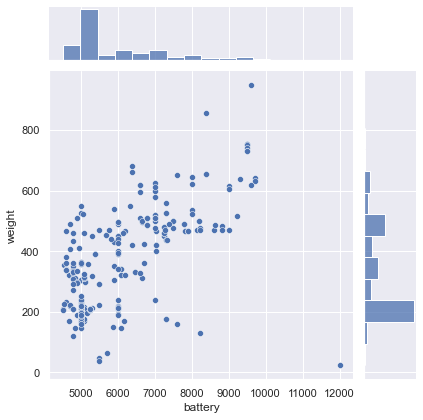

<IPython.core.display.Javascript object>

In [42]:
plt.figure(figsize=(50, 15))

sns.jointplot(data=data_battery, y="weight", x="battery")
plt.xticks(rotation=90)

weight increases as battery increases.

**Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones are available across different brands with a screen size larger than 6 inches?**

In [43]:
screen_6 = data[data["screen_size"] / 2.54 > 6]
print(screen_6["brand_name"].value_counts())
print("Total:", screen_6.shape[0])

Huawei        159
Samsung       128
Others        116
Honor          87
Vivo           86
Xiaomi         85
Lenovo         72
Oppo           70
LG             68
Motorola       44
Asus           44
Realme         40
Alcatel        28
Nokia          28
Meizu          25
Apple          24
ZTE            22
Acer           19
OnePlus        16
Sony           14
Micromax       11
Infinix        10
HTC             8
Gionee          7
Google          4
XOLO            4
Coolpad         3
Spice           2
BlackBerry      2
Lava            2
Karbonn         2
Panasonic       2
Celkon          2
Microsoft       1
Name: brand_name, dtype: int64
Total: 1235


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='brand_name', ylabel='count'>

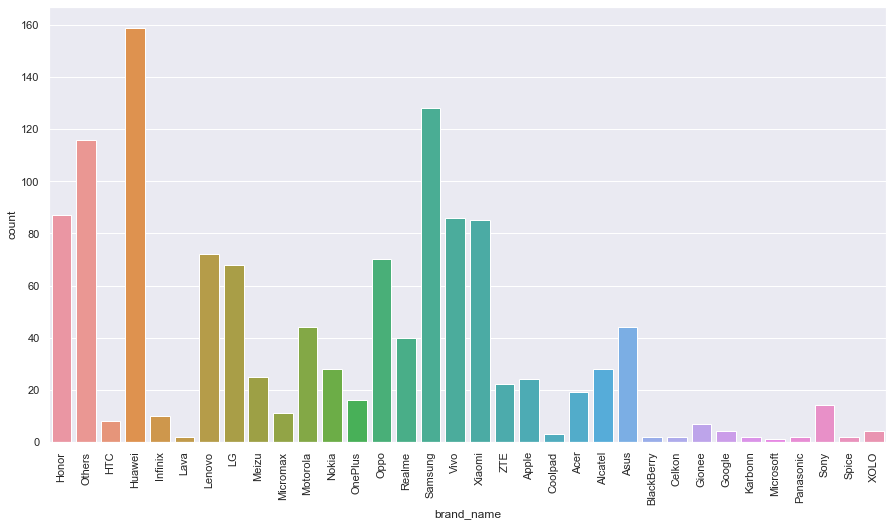

<IPython.core.display.Javascript object>

In [44]:
plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)
sns.countplot(screen_6["brand_name"])

1235 phones across all brands have phones with screen_size>6 inches.
Huawei has the most number of phones with large screen followed by Samsung.

<AxesSubplot:xlabel='used_price', ylabel='new_price'>

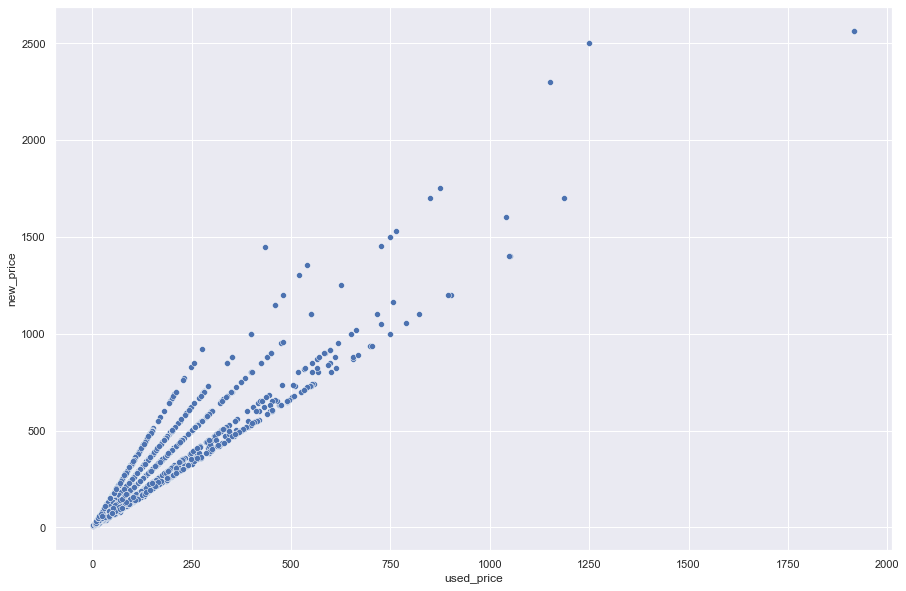

<IPython.core.display.Javascript object>

In [45]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x=data["used_price"], y=data["new_price"])

**Budget phones nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of budget phones offering greater than 8MP selfie cameras across brands?**

<AxesSubplot:xlabel='used_price', ylabel='new_price'>

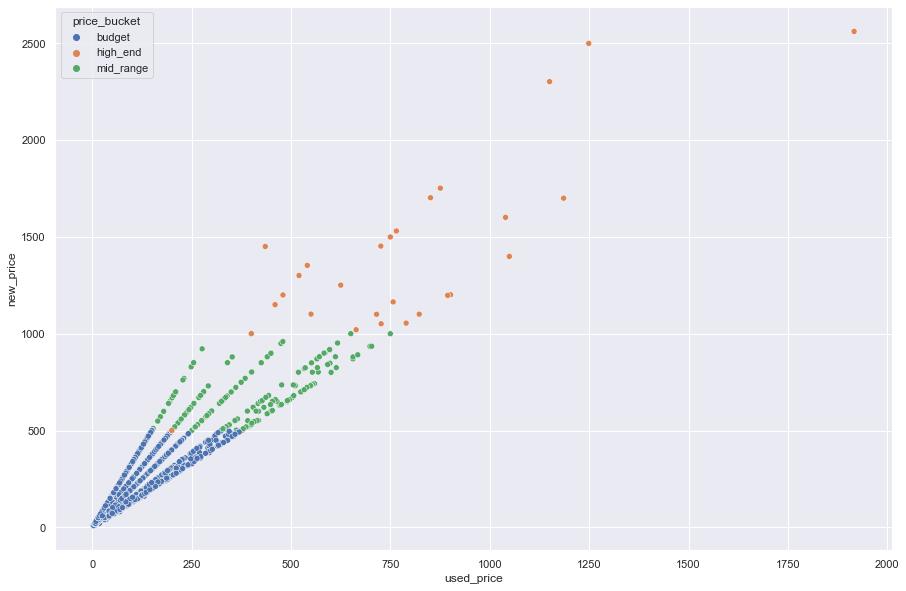

<IPython.core.display.Javascript object>

In [46]:
ctr = 0
data_price = pd.DataFrame(data)

data_price["price_bucket"] = "None"
for i in data["new_price"]:
    if i <= 500:
        data_price["price_bucket"][ctr] = "budget"
    elif i >= 501 and i <= 1000:
        data_price["price_bucket"][ctr] = "mid_range"
    else:
        data_price["price_bucket"][ctr] = "high_end"
    ctr = ctr + 1

budget_data = data_price[data_price["price_bucket"] == "budget"]
plt.figure(figsize=(15, 10))
sns.scatterplot(
    x=data["used_price"], y=data["new_price"], hue=data_price["price_bucket"]
)

In [183]:
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price,price_bucket
0,Honor,Android,23.97,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,86.96,budget
1,Honor,Android,28.10,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,161.49,budget
2,Honor,Android,24.29,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,268.55,budget
3,Honor,Android,26.04,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,180.23,budget
4,Honor,Android,15.72,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,103.80,budget


<IPython.core.display.Javascript object>

In [47]:
budget_data_selfie8 = budget_data[budget_data["selfie_camera_mp"] >= 8]
budget_data_selfie8["brand_name"].value_counts()

Huawei        138
Others         94
Honor          84
Vivo           79
Oppo           71
Samsung        70
Xiaomi         67
ZTE            55
Lenovo         45
Motorola       43
LG             40
Nokia          38
Realme         32
Asus           31
Meizu          29
HTC            29
Sony           27
Gionee         16
Coolpad        12
Infinix        10
Alcatel         9
Google          8
BlackBerry      8
Panasonic       6
OnePlus         6
Micromax        4
Acer            4
Lava            3
Karbonn         2
Name: brand_name, dtype: int64

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='brand_name', ylabel='count'>

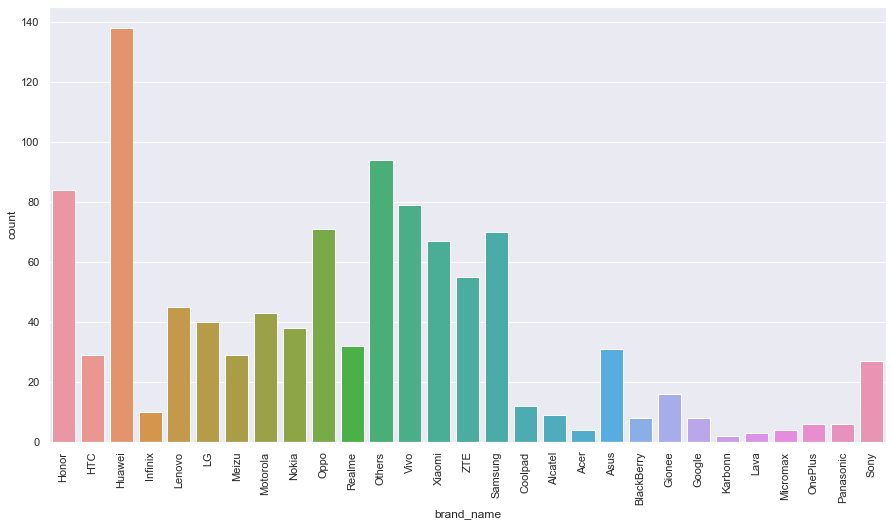

<IPython.core.display.Javascript object>

In [48]:
plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)
sns.countplot(budget_data_selfie8["brand_name"])

Huawei makes higher number of phones with selfie_camera_mp > 8

**Which attributes are highly correlated with the used phone price?**

In [49]:
used_price_corr = data.corrwith(data["used_price"])
used_price_corr

screen_size         0.385928
main_camera_mp      0.281065
selfie_camera_mp    0.497530
int_memory          0.404913
ram                 0.522659
battery             0.363767
weight              0.170654
release_year        0.456764
days_used          -0.470760
new_price           0.926087
used_price          1.000000
dtype: float64

<IPython.core.display.Javascript object>

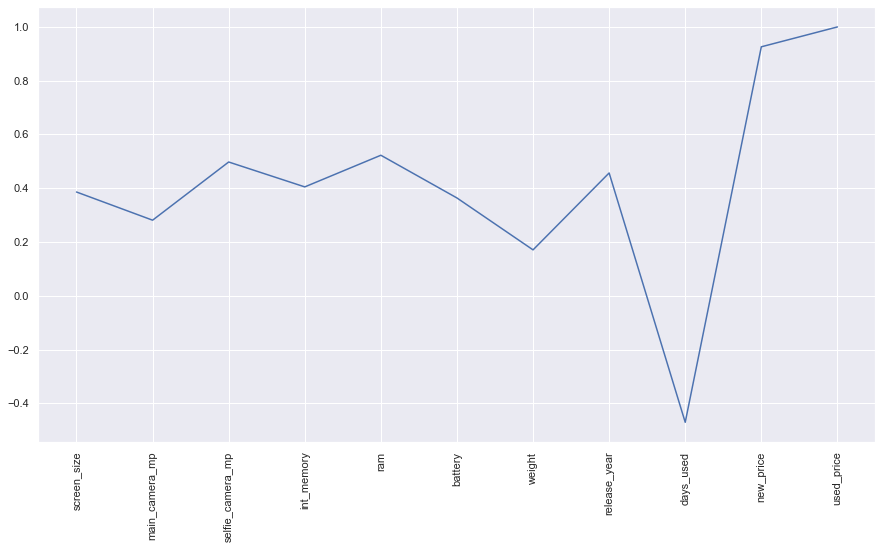

<IPython.core.display.Javascript object>

In [50]:
plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)
plt.plot(used_price_corr)

* used_price has the highest correlation with new_price followed by ram and selfie_camera_mp
* used_price has negative correlation with days_used

In [51]:
data.columns

Index(['brand_name', 'os', 'screen_size', '4g', '5g', 'main_camera_mp',
       'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight',
       'release_year', 'days_used', 'new_price', 'used_price', 'price_bucket'],
      dtype='object')

<IPython.core.display.Javascript object>

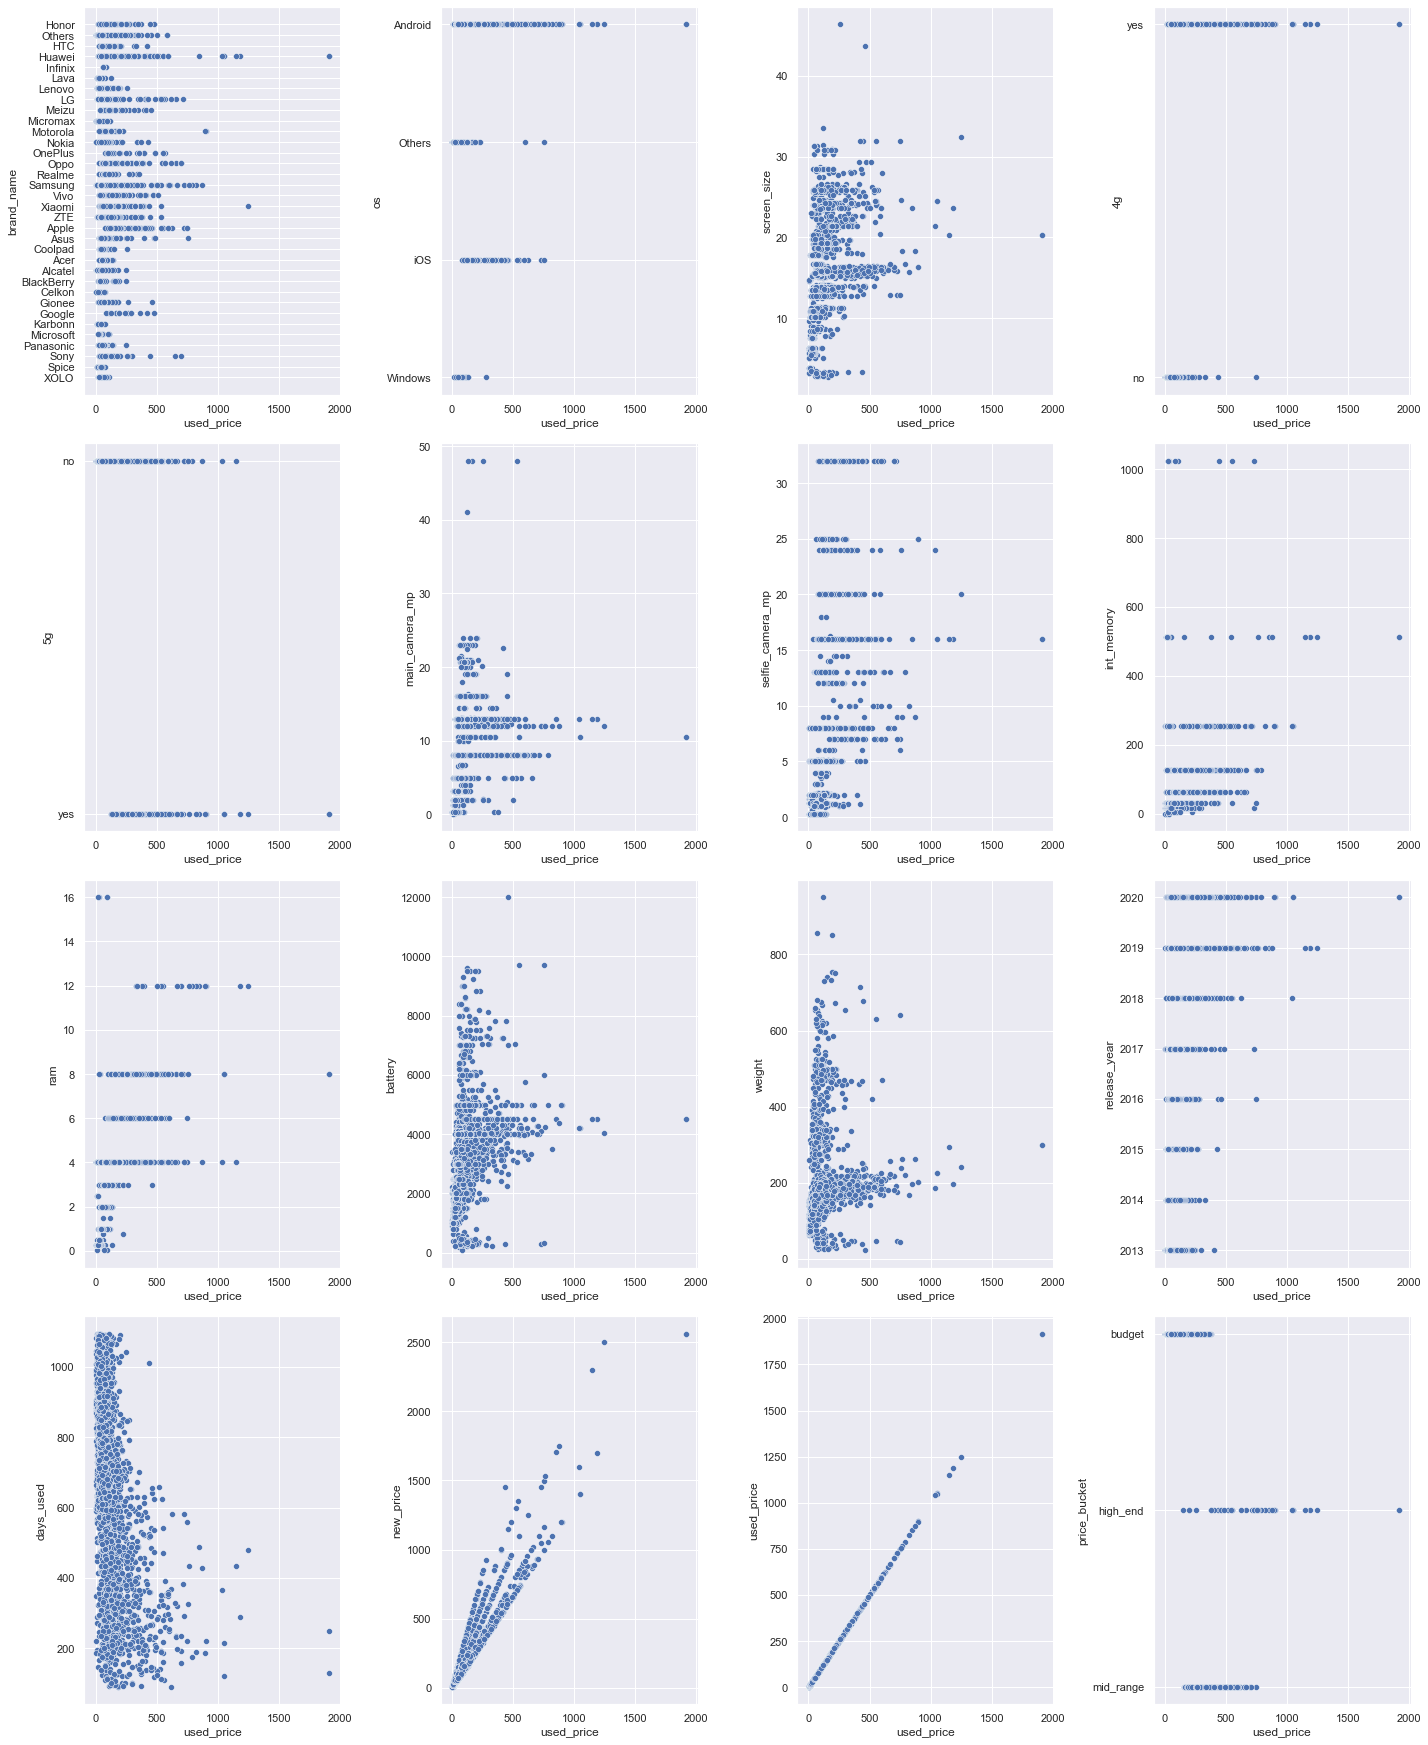

<IPython.core.display.Javascript object>

In [52]:
columns = data.columns
plt.figure(figsize=(20, 30))

for i, variable in enumerate(columns):
    plt.subplot(5, 4, i + 1)
    sns.scatterplot(data=data, x="used_price", y=data[variable])
    plt.tight_layout()

plt.show()

**Observations**
* used_price is very low for Windows OS phones.
* There is higher correlation with selfie_camera_mp than with main_camera_mp.
* used_price is higher when days_used is less.
* It is higher for newly released phones and lower for older phones.
* used_price is higher if new_price is high.
* It is higher for lower weight phones.
* It is higher for phones with battery mAh between 4000 and 5000.
* Higher used_price can be seen in phones with high ram and 400GB-600GB of internal_memory
* It is lower for phones with screen sizes lower than 10cm and higher than 30cm

## Data Processing

### Summary of data

In [53]:
data.describe()  # describing numerical values

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
count,3571.000000,3391.000000,3569.000000,3561.000000,3561.000000,3565.000000,3564.000000,3571.000000,3571.000000,3571.000000,3571.000000
mean,14.803892,9.400454,6.547352,54.532607,4.056962,3067.225666,179.424285,2015.964996,675.391487,237.389037,109.880277
std,5.153092,4.818396,6.879359,84.696246,1.391844,1364.206665,90.280856,2.291784,248.640972,197.545581,121.501226
min,2.700000,0.080000,0.300000,0.005000,0.030000,80.000000,23.000000,2013.000000,91.000000,9.130000,2.510000
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,140.000000,2014.000000,536.000000,120.130000,45.205000
50%,13.490000,8.000000,5.000000,32.000000,4.000000,3000.000000,159.000000,2016.000000,690.000000,189.800000,75.530000
75%,16.510000,13.000000,8.000000,64.000000,4.000000,4000.000000,184.000000,2018.000000,872.000000,291.935000,126.000000
max,46.360000,48.000000,32.000000,1024.000000,16.000000,12000.000000,950.000000,2020.000000,1094.000000,2560.200000,1916.540000


<IPython.core.display.Javascript object>

* There is a big difference between mean and max values in int_memory, battery, new_price and used price which means there are outliers.

In [54]:
data.describe(exclude="number")  # describing non-numeric values

,brand_name,os,4g,5g,price_bucket
count,3571,3571,3571,3571,3571
unique,34,4,2,2,3
top,Others,Android,yes,no,budget
freq,509,3246,2359,3419,3325


<IPython.core.display.Javascript object>

* Most of the phones have Android OS
* Most of the phones don't have 5G
* 4G, 5G and os columns can be categorical variables

### Changing datatypes

In [55]:
# Categorical column should be converted to categorical type
# (It reduces the data space required to store the dataframe,
# every class in the categorical column will be represented by a number under the hood.
# This is useful during model building)

data["4g"] = data["4g"].astype("category")
data["5g"] = data["5g"].astype("category")
data["os"] = data.os.astype("category")

<IPython.core.display.Javascript object>

### Checking for missing values

In [56]:
data.isnull().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      180
selfie_camera_mp      2
int_memory           10
ram                  10
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
price_bucket          0
dtype: int64

<IPython.core.display.Javascript object>

* For an unskewed numerical variable, the mean of the variable can be used to impute missing values.
* For a skewed numerical variable, the median of the variable can be used to impute missing values.
* For a categorical variable, the most frequent value can be used to impute missing values.

Check skewness of columns with missing values:

<AxesSubplot:xlabel='weight', ylabel='Count'>

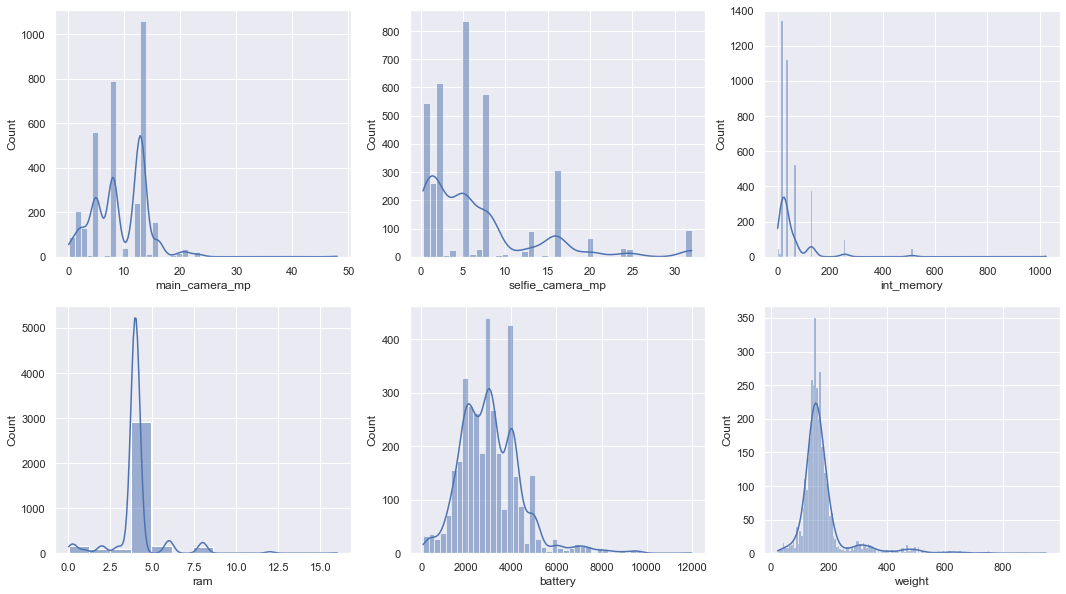

<IPython.core.display.Javascript object>

In [57]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.histplot(ax=axes[0, 0], data=data, x="main_camera_mp", kde=True)
sns.histplot(ax=axes[0, 1], data=data, x="selfie_camera_mp", kde=True)
sns.histplot(ax=axes[0, 2], data=data, x="int_memory", kde=True)
sns.histplot(ax=axes[1, 0], data=data, x="ram", kde=True)
sns.histplot(ax=axes[1, 1], data=data, x="battery", kde=True)
sns.histplot(ax=axes[1, 2], data=data, x="weight", kde=True)

All 6 variables are right skewed, so missing values will be replaced with the median values.

### Filling missing values 

In [58]:
# All numeric missing values filled with median

medianFiller = lambda x: x.fillna(x.median())  # fill missing values with median
numeric_columns = data.select_dtypes(
    include=np.number
).columns.tolist()  # select all numeric columns
data[numeric_columns] = data[numeric_columns].apply(medianFiller, axis=0)

<IPython.core.display.Javascript object>

In [59]:
data.isnull().sum()

brand_name          0
os                  0
screen_size         0
4g                  0
5g                  0
main_camera_mp      0
selfie_camera_mp    0
int_memory          0
ram                 0
battery             0
weight              0
release_year        0
days_used           0
new_price           0
used_price          0
price_bucket        0
dtype: int64

<IPython.core.display.Javascript object>

In [60]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3571,34,Others,509,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3571,4,Android,3246,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3571,NaN,NaN,NaN,14.8039,5.15309,2.7,12.7,13.49,16.51,46.36
4g,3571,2,yes,2359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3571,2,no,3419,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3571,NaN,NaN,NaN,9.32986,4.70534,0.08,5,8,13,48
selfie_camera_mp,3571,NaN,NaN,NaN,6.54649,6.87753,0.3,2,5,8,32
int_memory,3571,NaN,NaN,NaN,54.4695,84.5859,0.005,16,32,64,1024
ram,3571,NaN,NaN,NaN,4.0568,1.3899,0.03,4,4,4,16
battery,3571,NaN,NaN,NaN,3067.11,1363.06,80,2100,3000,4000,12000


<IPython.core.display.Javascript object>

**Observations:**
* Q1,Q2,Q3 of variable 'ram' is all equal to 4
* Data has been collected for 8 years: 2013-2020


In [61]:
data["Age"] = (
    2021 - data["release_year"]
)  # number of years is more meaningful than the year the phone was made

<IPython.core.display.Javascript object>

### Outlier detection

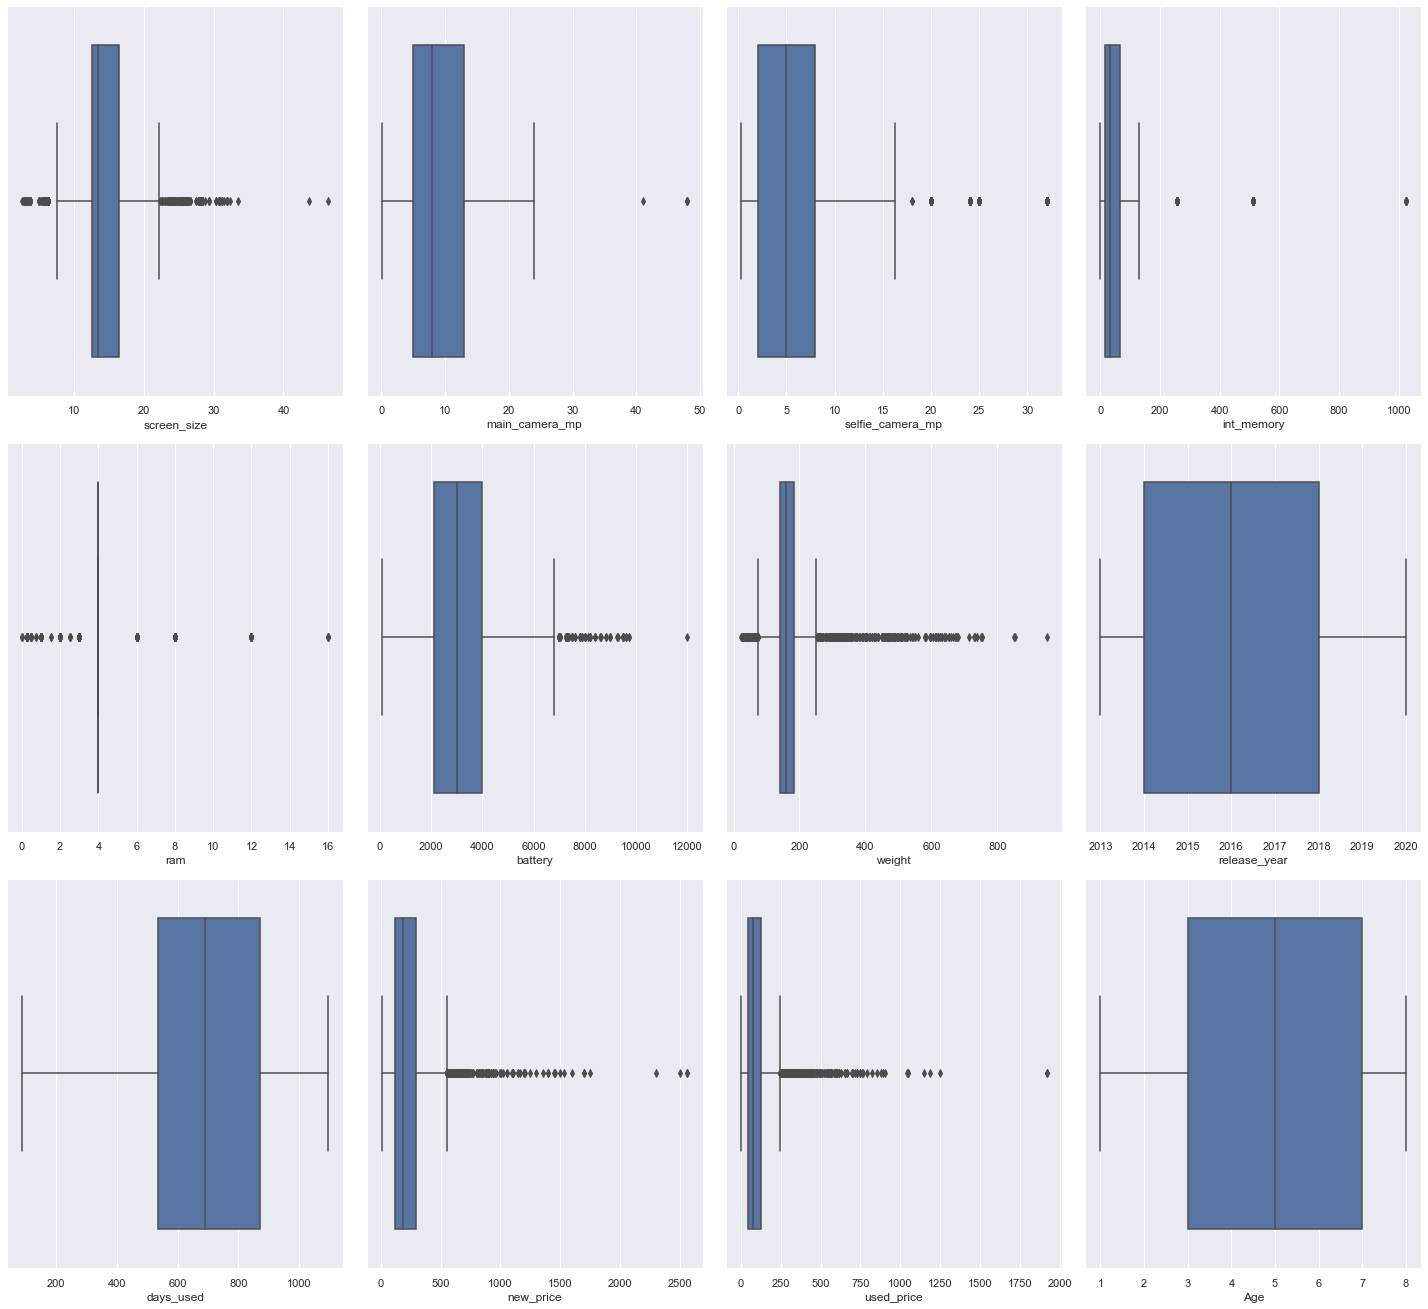

<IPython.core.display.Javascript object>

In [62]:
# let's plot the boxplots of all columns to check for outliers
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))
# print(numeric_columns)
for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(data[variable], whis=1.5, orient="h")  # whisker 1.5 x iqr
    plt.tight_layout()

plt.show()

In [63]:
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(
        df[col], Lower_Whisker, Upper_Whisker
    )  # lower outliers=lower whisker

    return df


def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

<IPython.core.display.Javascript object>

In [64]:
# treating the outliers
numerical_col = data.select_dtypes(
    include=np.number
).columns.tolist()  # get all numeric cols
numerical_col.remove("ram")
numerical_col.remove("release_year")
numerical_col.remove("days_used")
numerical_col.remove("Age")
numerical_col
df = treat_outliers_all(data, numerical_col)  # treat them

<IPython.core.display.Javascript object>

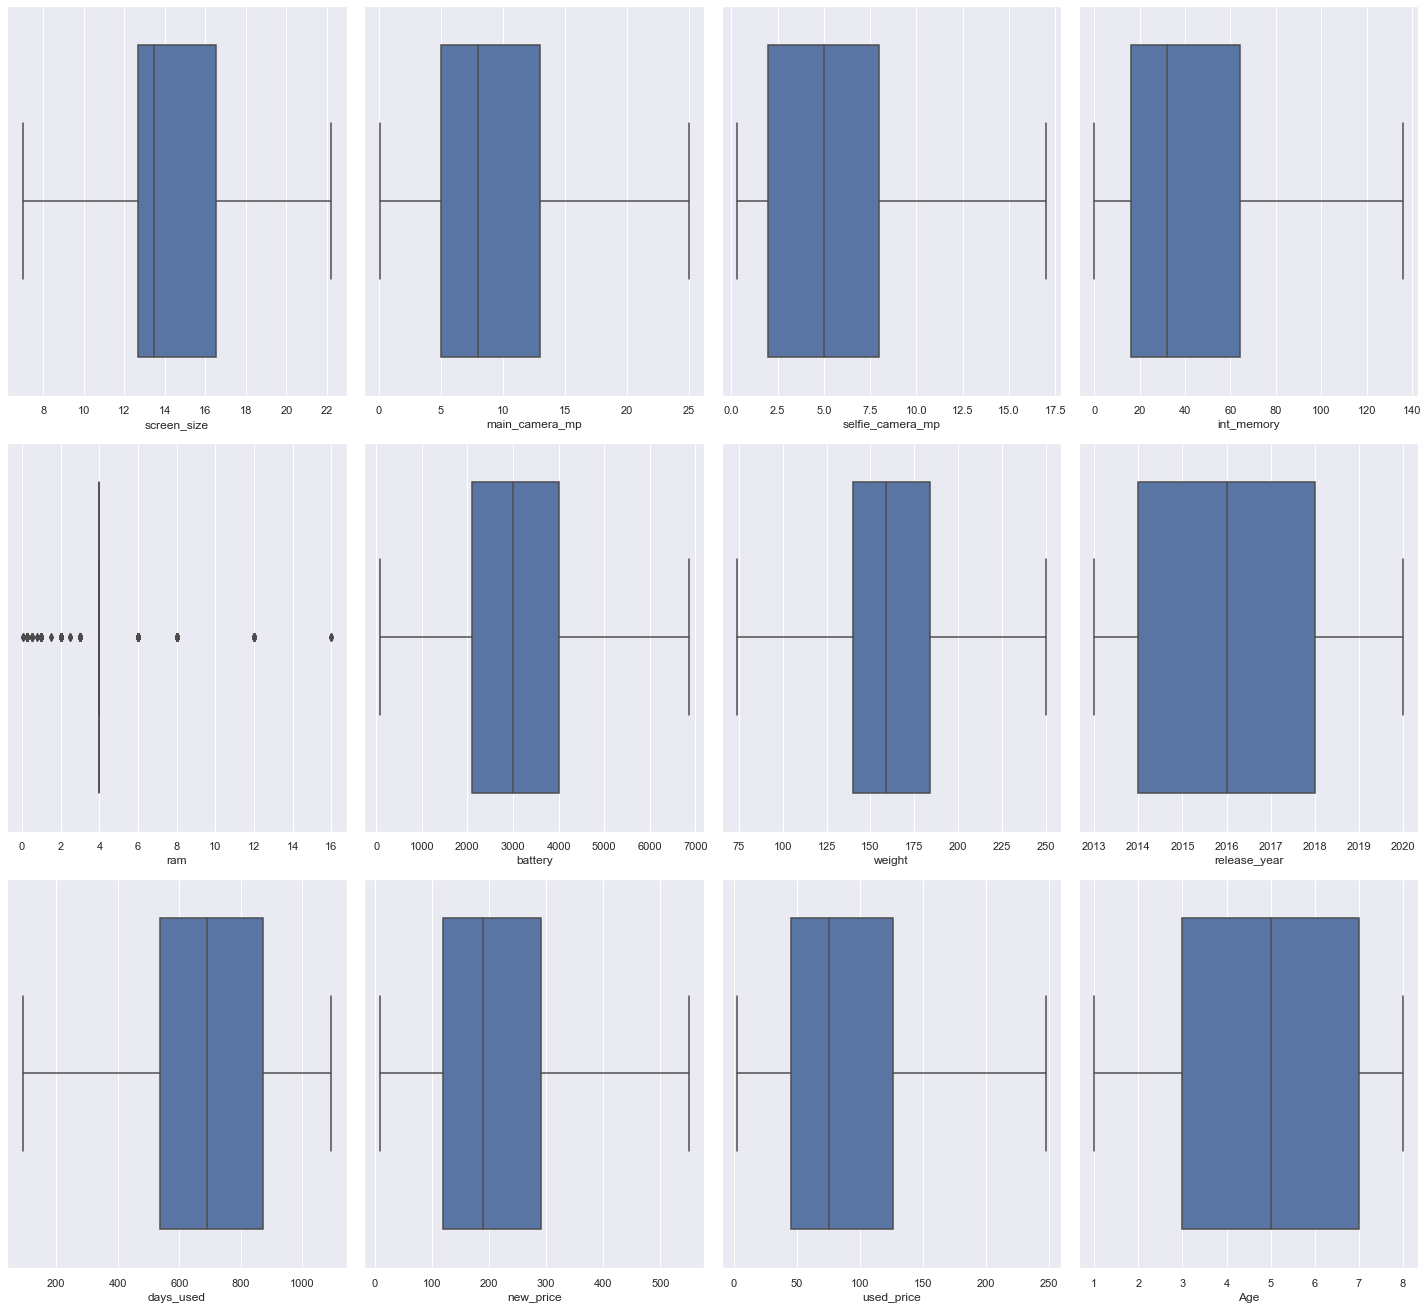

<IPython.core.display.Javascript object>

In [65]:
# let's look at the boxplots to see if the outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
#    plt.title(variable)

plt.show()

## EDA 
(after Data Processing)

### Price variation with OS


<AxesSubplot:xlabel='os', ylabel='new_price'>

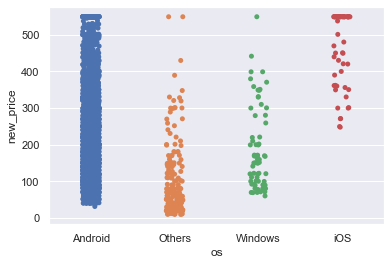

<IPython.core.display.Javascript object>

In [194]:
sns.stripplot(data=data, x="os", y="new_price")

* phones with iOS operating systems are more expensive, followed by Windows and Android.

<AxesSubplot:xlabel='used_price', ylabel='new_price'>

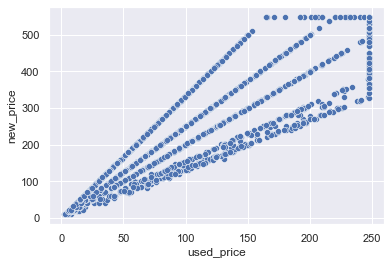

<IPython.core.display.Javascript object>

In [195]:
sns.scatterplot(data=data, x="used_price", y="new_price")

* Max price of new_price is now 500 euros
* Max price of used_price is now 250 euros

In [66]:
used_price_corr2 = data.corrwith(data["used_price"])
used_price_corr2

screen_size         0.508230
main_camera_mp      0.403944
selfie_camera_mp    0.641331
int_memory          0.592726
ram                 0.488588
battery             0.485956
weight              0.358080
release_year        0.539031
days_used          -0.553117
new_price           0.907948
used_price          1.000000
Age                -0.539031
dtype: float64

<IPython.core.display.Javascript object>

* Correlation of used price with other variables have increased. 
* Correlation with days_used and Age are almost same.

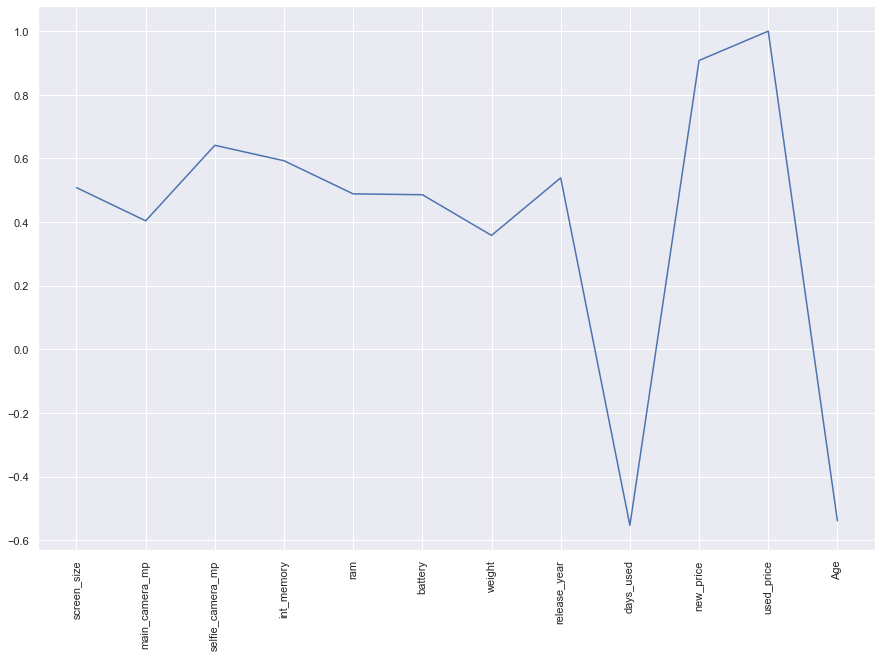

<IPython.core.display.Javascript object>

In [67]:
plt.figure(figsize=(15, 10))
plt.xticks(rotation=90)
plt.plot(used_price_corr2)

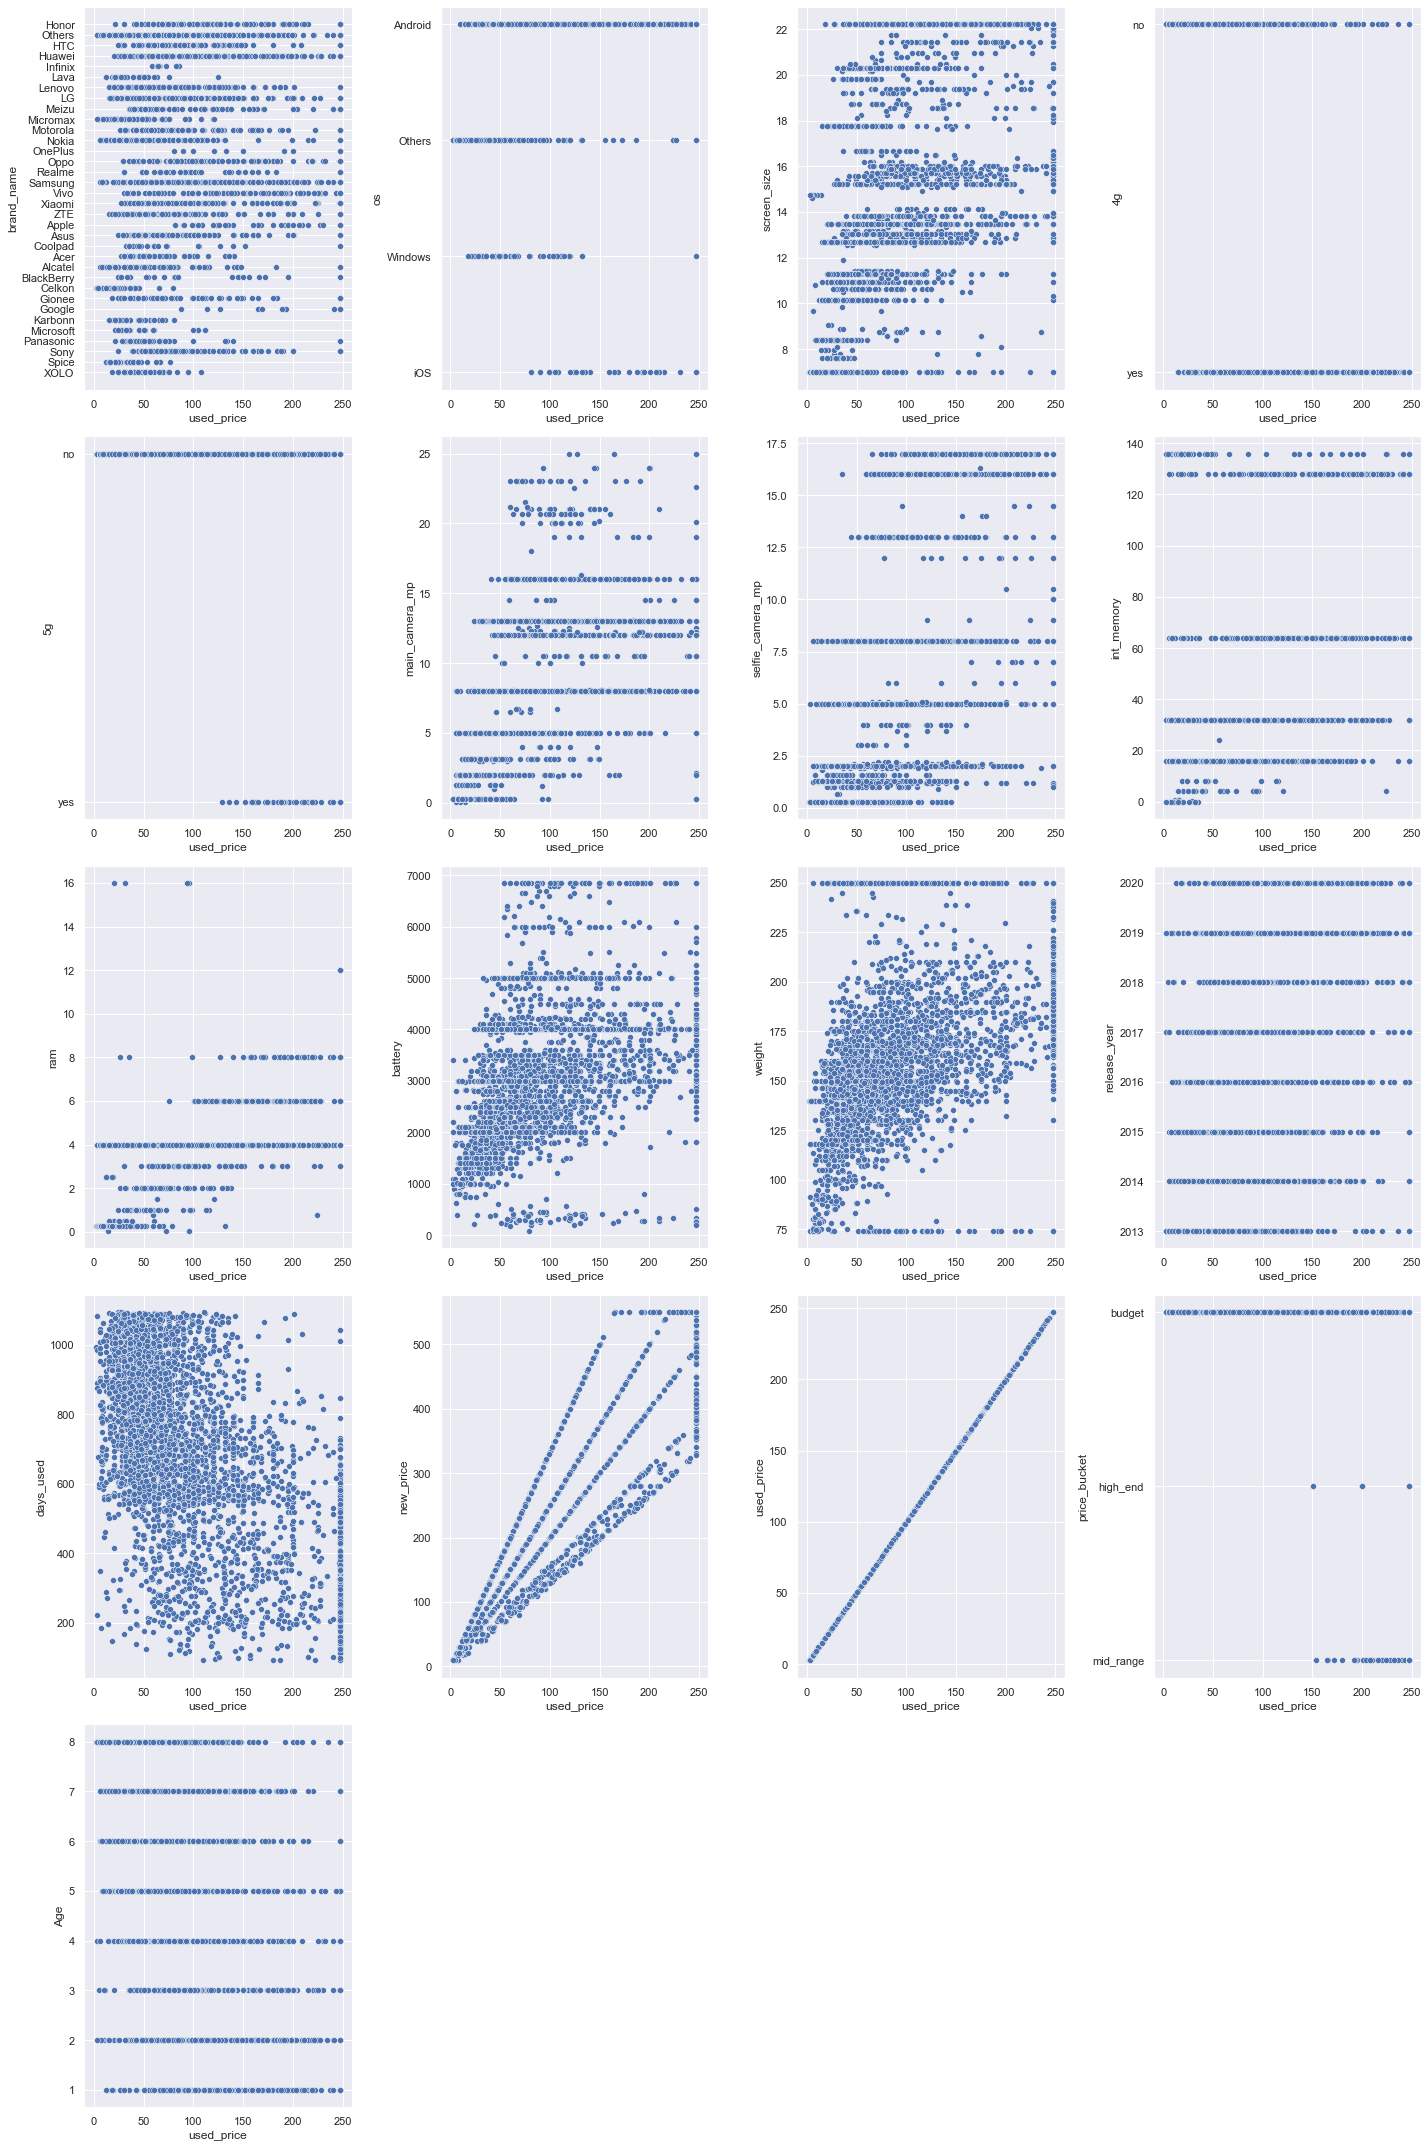

<IPython.core.display.Javascript object>

In [68]:
columns = data.columns
plt.figure(figsize=(20, 30))

for i, variable in enumerate(columns):
    plt.subplot(5, 4, i + 1)
    sns.scatterplot(data=data, x="used_price", y=data[variable])
    plt.tight_layout()

plt.show()

* Max value os new_price is 500
* Max value of used_price is 250

### Linear Regression

In [69]:
# defining X and y variables
X = data.drop(["used_price", "release_year"], axis=1)
y = data["used_price"]

<IPython.core.display.Javascript object>

In [70]:
X = pd.get_dummies(  # converting categorical columns into numeric by One Hot encoding
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,new_price,Age,...,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes,price_bucket_high_end,price_bucket_mid_range
0,22.225,13.0,5.0,64.0,3.0,3020.0,146.0,127,111.62,1,...,0,0,0,0,0,0,1,0,0,0
1,22.225,13.0,16.0,128.0,8.0,4300.0,213.0,325,249.39,1,...,0,0,0,0,0,0,1,1,0,0
2,22.225,13.0,8.0,128.0,8.0,4200.0,213.0,162,359.47,1,...,0,0,0,0,0,0,1,1,0,0
3,22.225,13.0,8.0,64.0,6.0,6850.0,250.0,345,278.93,1,...,0,0,0,0,0,0,1,1,0,0
4,15.720,13.0,8.0,64.0,3.0,5000.0,185.0,293,140.87,1,...,0,0,0,0,0,0,1,0,0,0


<IPython.core.display.Javascript object>

In [71]:
X.isnull().sum()

screen_size               0
main_camera_mp            0
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
days_used                 0
new_price                 0
Age                       0
brand_name_Alcatel        0
brand_name_Apple          0
brand_name_Asus           0
brand_name_BlackBerry     0
brand_name_Celkon         0
brand_name_Coolpad        0
brand_name_Gionee         0
brand_name_Google         0
brand_name_HTC            0
brand_name_Honor          0
brand_name_Huawei         0
brand_name_Infinix        0
brand_name_Karbonn        0
brand_name_LG             0
brand_name_Lava           0
brand_name_Lenovo         0
brand_name_Meizu          0
brand_name_Micromax       0
brand_name_Microsoft      0
brand_name_Motorola       0
brand_name_Nokia          0
brand_name_OnePlus        0
brand_name_Oppo           0
brand_name_Others         0
brand_name_Panasonic      0
brand_name_Realme   

<IPython.core.display.Javascript object>

In [72]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

<IPython.core.display.Javascript object>

In [73]:
x_train.shape

(2499, 50)

<IPython.core.display.Javascript object>

In [74]:
x_test.shape

(1072, 50)

<IPython.core.display.Javascript object>

In [75]:
# fitting the model on the train data (70% of the whole data)
from sklearn.linear_model import LinearRegression

linearregression = LinearRegression()
linearregression.fit(x_train, y_train)

LinearRegression()

<IPython.core.display.Javascript object>

In [76]:
coef_df = pd.DataFrame(
    np.append(linearregression.coef_, linearregression.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

coef_df

,Coefficients
screen_size,0.091441
main_camera_mp,-0.395896
selfie_camera_mp,0.686999
int_memory,0.095577
ram,0.365240
battery,-0.000011
weight,-0.011192
days_used,-0.085035
new_price,0.404171
Age,-0.215178


<IPython.core.display.Javascript object>

**Let's check the performance of the model using different metrics.**

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
    
* We will create a function which will print out all the above metrics in one go.

In [77]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    print(type(np.mean(np.abs(targets - predictions) / targets) * 100))
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE
    # print(type(mape))
    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [78]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
linearregression_train_perf = model_performance_regression(
    linearregression, x_train, y_train
)
linearregression_train_perf

Training Performance

<class 'float'>


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,13.736263,10.178695,0.956565,0.955678,18.7918


<IPython.core.display.Javascript object>

In [79]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
linearregression_test_perf = model_performance_regression(
    linearregression, x_test, y_test
)
linearregression_test_perf

Test Performance

<class 'float'>


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,13.447049,10.11452,0.95927,0.957275,16.611077


<IPython.core.display.Javascript object>

Observations

The training  𝑅2  is 95.9%, indicating that the model explains 95.9% of the variation in the train data. So, the model is not underfitting.

MAE and RMSE on the train and test sets are comparable, which shows that the model is not overfitting.

MAE indicates that our current model is able to predict the used price within a mean error of 10.11 euros on the test data.

MAPE on the test set suggests we can predict within 16% of the used price.

In [80]:
# unlike sklearn, statsmodels does not add a constant to the data on its own
# we have to add the constant manually
x_train1 = sm.add_constant(x_train)  # adding a column of 1s
# adding constant to the test data
x_test1 = sm.add_constant(x_test)

olsmod0 = sm.OLS(y_train, x_train1).fit()  # 0th model
print(olsmod0.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     1078.
Date:                Fri, 20 Aug 2021   Prob (F-statistic):               0.00
Time:                        13:34:13   Log-Likelihood:                -10093.
No. Observations:                2499   AIC:                         2.029e+04
Df Residuals:                    2448   BIC:                         2.059e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     62

<IPython.core.display.Javascript object>

**Observations**

- Negative values of the coefficient show that *used_price* decreases with the increase of corresponding attribute value.

- Positive values of the coefficient show that *used_price* increases with the increase of corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

- But these variables might contain multicollinearity, which will affect the p-values.

- So, we need to deal with multicollinearity and check the other assumptions of linear regression first, and then look at the p-values.

### Checking Linear Regression Assumptions

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR MULTICOLLINEARITY

* Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent. If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity in the linear model, the coefficients that the model suggests are unreliable.

* There are different ways of detecting (or testing) multicollinearity. One such way is by using the Variance Inflation Factor, or VIF.

* **Variance  Inflation Factor (VIF)**:  Variance inflation factors measure the inflation in the variances of the regression parameter estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient $\beta_k$ is "inflated" by the existence of correlation among the predictor variables in the model.
    - If VIF is 1, then there is no correlation among the $k$th predictor and the remaining predictor variables, and hence, the variance of $\beta_k$ is not inflated at all.

* **General Rule of thumb**:
    - If VIF is between 1 and 5, then there is low multicollinearity.
    - If VIF is between 5 and 10, we say there is moderate multicollinearity.
    - If VIF is exceeding 10, it shows signs of high multicollinearity.

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

In [82]:
checking_vif(x_train1)

,feature,VIF
0,const,175.097835
1,screen_size,3.573378
2,main_camera_mp,2.289509
3,selfie_camera_mp,4.060683
4,int_memory,2.230300
5,ram,1.739134
6,battery,3.746169
7,weight,3.213572
8,days_used,2.637362
9,new_price,4.015329


<IPython.core.display.Javascript object>

**Observations**
1. brand_name_Apple
2. brand_name_Others
3. os_iOS
have very high VIF scores

brand_name_Apple os_iOS are correlated with each other. This is true because only Apple phones have iOS operating systems.



### Removing Multicollinearity

To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [83]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[
            :, ~predictors.columns.str.startswith(cols)
        ]  # ~ => don't consider this column

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

<IPython.core.display.Javascript object>

In [84]:
col_list = [
    "brand_name_Apple",
    "brand_name_Others",
    "os_iOS",
]

res = treating_multicollinearity(x_train1, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_Others,0.955695,13.875934
1,os_iOS,0.955657,13.881857
2,brand_name_Apple,0.955596,13.891325


<IPython.core.display.Javascript object>

* Drop brand_name_others first because it has least difference with adj-R sq.

In [85]:
col_to_drop = "brand_name_Others"
x_train2 = x_train1.loc[:, ~x_train1.columns.str.startswith(col_to_drop)]
x_test2 = x_test1.loc[:, ~x_test1.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  brand_name_Others


,feature,VIF
0,const,101.422463
1,screen_size,3.569553
2,main_camera_mp,2.289448
3,selfie_camera_mp,4.059660
4,int_memory,2.229755
5,ram,1.738597
6,battery,3.745782
7,weight,3.213464
8,days_used,2.636545
9,new_price,4.015012


<IPython.core.display.Javascript object>

In [86]:
col_list = [
    "brand_name_Apple",
    "os_iOS",
]

res = treating_multicollinearity(x_train2, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,os_iOS,0.955674,13.879176
1,brand_name_Apple,0.955613,13.888768


<IPython.core.display.Javascript object>

* Next we will drop os_iOS

In [87]:
col_to_drop = "os_iOS"
x_train3 = x_train2.loc[:, ~x_train2.columns.str.startswith(col_to_drop)]
x_test3 = x_test2.loc[:, ~x_test2.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train3)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  os_iOS


,feature,VIF
0,const,101.059299
1,screen_size,3.568567
2,main_camera_mp,2.284450
3,selfie_camera_mp,4.043396
4,int_memory,2.228131
5,ram,1.735867
6,battery,3.735812
7,weight,3.210249
8,days_used,2.635520
9,new_price,4.013287


<IPython.core.display.Javascript object>

**The above predictors have no multicollinearity and the assumption is satisfied.**

Let's check the model performance.

In [88]:
olsmod1 = sm.OLS(y_train, x_train3).fit()
print(olsmod1.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     1123.
Date:                Fri, 20 Aug 2021   Prob (F-statistic):               0.00
Time:                        13:34:41   Log-Likelihood:                -10095.
No. Observations:                2499   AIC:                         2.029e+04
Df Residuals:                    2450   BIC:                         2.057e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     62

<IPython.core.display.Javascript object>

**Observations**

- We can see that adj. R-squared 0.956 still remains the same, which shows that the dropped columns did not have much effect on the model.
- As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance.


- Some columns have p-value > 0.05. So, they are not significant and we'll drop them.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [89]:
# initial list of columns
cols = x_train3.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train3[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()
    print(model.summary())
    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     1123.
Date:                Fri, 20 Aug 2021   Prob (F-statistic):               0.00
Time:                        13:34:45   Log-Likelihood:                -10095.
No. Observations:                2499   AIC:                         2.029e+04
Df Residuals:                    2450   BIC:                         2.057e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     62

strong multicollinearity or other numerical problems.
                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     1424.
Date:                Fri, 20 Aug 2021   Prob (F-statistic):               0.00
Time:                        13:34:45   Log-Likelihood:                -10095.
No. Observations:                2499   AIC:                         2.027e+04
Df Residuals:                    2460   BIC:                         2.049e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

strong multicollinearity or other numerical problems.
                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     1869.
Date:                Fri, 20 Aug 2021   Prob (F-statistic):               0.00
Time:                        13:34:45   Log-Likelihood:                -10097.
No. Observations:                2499   AIC:                         2.025e+04
Df Residuals:                    2469   BIC:                         2.043e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

<IPython.core.display.Javascript object>

In [90]:
x_train4 = x_train3[selected_features]
x_test4 = x_test3[selected_features]

<IPython.core.display.Javascript object>

In [91]:
olsmod2 = sm.OLS(y_train, x_train4).fit()
print(olsmod2.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     3178.
Date:                Fri, 20 Aug 2021   Prob (F-statistic):               0.00
Time:                        13:34:50   Log-Likelihood:                -10107.
No. Observations:                2499   AIC:                         2.025e+04
Df Residuals:                    2481   BIC:                         2.035e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     60

<IPython.core.display.Javascript object>

**Now no feature has p-value greater than 0.05, so we'll consider the features in *x_train3* as the final ones and *olsmod2* as final model.**

**Observations**

* Now adjusted R-squared is 0.956, i.e., our model is able to explain ~95% of the variance. This shows that the model is good.
* The adjusted R-squared in *olsmod0* (where we considered all the variables) was 0.956. This shows that the variables we dropped were not affecting the model much.

**Now we'll check the rest of the assumptions on *olsmod2*.**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**


### TEST FOR LINEARITY AND INDEPENDENCE

**Why the test?**

* Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.
* The independence of the error terms (or residuals) is important. If the residuals are not independent, then the confidence intervals of the coefficient estimates will be narrower and make us incorrectly conclude a parameter to be statistically significant.

**How to check linearity and independence?**

- Make a plot of fitted values vs residuals.
- If they don't follow any pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

**How to fix if this assumption is not followed?**

* We can try to transform the variables and make the relationships linear.

In [92]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
844,100.48,102.535086,-2.055086
1539,111.68,118.301864,-6.621864
3452,113.89,111.527541,2.362459
1727,64.09,69.769298,-5.679298
1926,67.95,69.319942,-1.369942


<IPython.core.display.Javascript object>

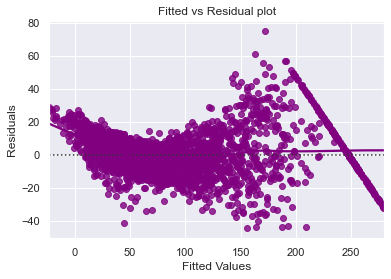

<IPython.core.display.Javascript object>

In [93]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

 The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

* If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.

* We do see some kind of pattern in this plot. A non linear model will be able to predict better. 

### TEST FOR NORMALITY

**Why the test?**

* Error terms, or residuals, should be normally distributed. If the error terms are not normally distributed, confidence intervals of the coefficient estimates may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares. Non-normality suggests that there are a few unusual data points that must be studied closely to make a better model.

**How to check normality?**

* The shape of the histogram of residuals can give an initial idea about the normality.
* It can also be checked via a Q-Q plot of residuals. If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
* Other tests to check for normality includes the Shapiro-Wilk test.
    - Null hypothesis: Residuals are normally distributed
    - Alternate hypothesis: Residuals are not normally distributed

**How to fix if this assumption is not followed?**

* We can apply transformations like log, exponential, arcsinh, etc. as per our data.

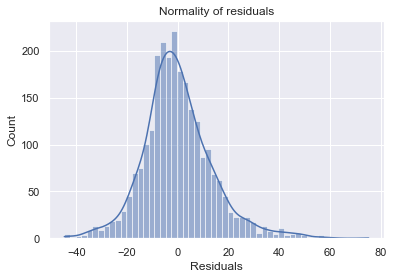

<IPython.core.display.Javascript object>

In [94]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

- The histogram of residuals does have a bell shape.
- Let's check the Q-Q plot.

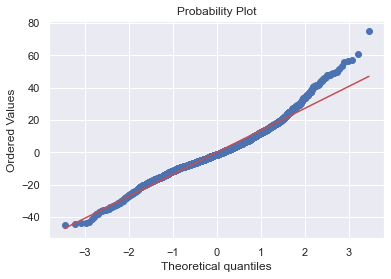

<IPython.core.display.Javascript object>

In [95]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

- The residuals more or less follow a straight line except for the tails.
- Let's check the results of the Shapiro-Wilk test.

In [96]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9692968130111694, pvalue=1.0489453795553758e-22)

<IPython.core.display.Javascript object>

Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- Strictly speaking, the residuals are not normal.
- However, as an approximation, we can accept this distribution as close to being normal.
- **So, the assumption is satisfied.**

### TEST FOR HOMOSCEDASTICITY

* **Homoscedascity**: If the variance of the residuals is symmetrically distributed across the regression line, then the data is said to be homoscedastic.

* **Heteroscedascity**: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic.

**Why the test?** 

* The presence of non-constant variance in the error terms results in heteroscedasticity. Generally, non-constant variance arises in presence of outliers.

**How to check for homoscedasticity?**

* The residual vs fitted values plot can be looked at to check for homoscedasticity. In the case of heteroscedasticity, the residuals can form an arrow shape or any other non-symmetrical shape.
* The goldfeldquandt test can also be used. If we get a p-value > 0.05 we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.
    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedasticity

**How to fix if this assumption is not followed?**

* Heteroscedasticity can be fixed by adding other important features or making transformations.

In [97]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.0370057332563154), ('p-value', 0.26455162695289614)]

<IPython.core.display.Javascript object>

**Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.**

**Now that we have checked all the assumptions of linear regression and they are satisfied, we can move towards the prediction part.**

In [98]:
# predictions on the test set
pred = olsmod2.predict(x_test4)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
2098,30.5200,22.443088
278,195.6700,194.402044
26,247.1925,230.414729
2910,89.9700,92.019629
2631,69.2000,66.353756
1582,89.5800,109.907945
2110,247.1925,257.218626
3160,65.3400,65.505387
2817,115.7700,106.536894
549,39.2900,48.108396


<IPython.core.display.Javascript object>

 We can observe here that our model has returned pretty good prediction results, and the actual and predicted values are comparable.

- We can also visualize comparison result as a bar graph.

**Note**: As the number of records is large, for representation purpose, we are taking a sample of 25 records only.

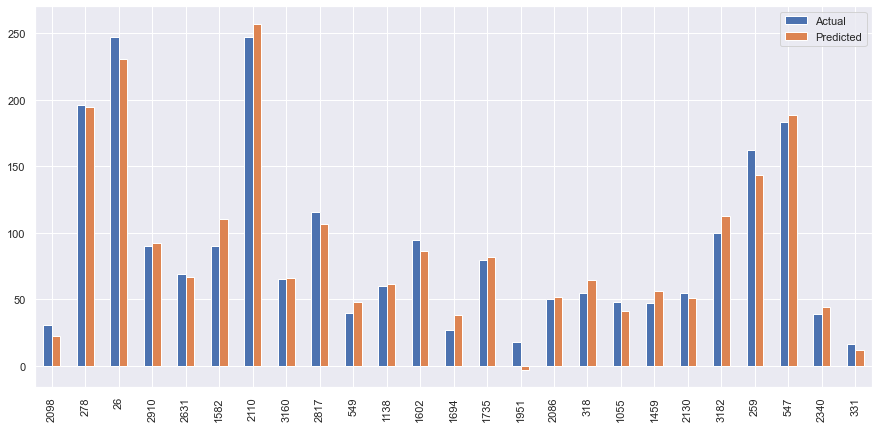

<IPython.core.display.Javascript object>

In [99]:
df1 = df_pred_test.sample(25, random_state=1)
df1.plot(kind="bar", figsize=(15, 7))
plt.show()

In [100]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train4, y_train)
olsmod2_train_perf

Training Performance

<class 'float'>


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,13.810034,10.227143,0.956097,0.955778,18.936423


<IPython.core.display.Javascript object>

In [101]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test4, y_test)
olsmod2_test_perf

Test Performance

<class 'float'>


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,13.416711,10.064505,0.959453,0.95876,16.571172


<IPython.core.display.Javascript object>

* The model is able to explain ~96% of the variation in the data, which is very good.

* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting.

* The MAPE on the test set suggests we can predict within 10% of the used_price. 

* Hence, we can conclude the model *olsmod2* is good for prediction as well as inference purposes.

**Let's compare the initial model created with sklearn and the final statsmodels model.**

In [102]:
models_train_comp_df = pd.concat(
    [linearregression_train_perf.T, olsmod2_train_perf.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression statsmodels",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Linear Regression sklearn,Linear Regression statsmodels
RMSE,13.736263,13.810034
MAE,10.178695,10.227143
R-squared,0.956565,0.956097
Adj. R-squared,0.955678,0.955778
MAPE,18.791800,18.936423


<IPython.core.display.Javascript object>

In [103]:
# test performance comparison

models_test_comp_df = pd.concat(
    [linearregression_test_perf.T, olsmod2_test_perf.T],
    axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression statsmodels",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Linear Regression sklearn,Linear Regression statsmodels
RMSE,13.447049,13.416711
MAE,10.114520,10.064505
R-squared,0.959270,0.959453
Adj. R-squared,0.957275,0.958760
MAPE,16.611077,16.571172


<IPython.core.display.Javascript object>

* The performance of the two models is close to each other.

**Let's recreate the final statsmodels model and print it's summary to gain insights.**

In [104]:
olsmodel_final = sm.OLS(y_train, x_train4).fit()
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     3178.
Date:                Fri, 20 Aug 2021   Prob (F-statistic):               0.00
Time:                        13:35:39   Log-Likelihood:                -10107.
No. Observations:                2499   AIC:                         2.025e+04
Df Residuals:                    2481   BIC:                         2.035e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     60

<IPython.core.display.Javascript object>

### Insights

* selfie_camera, memory (ram and internal_memory) and new_price have a positive impact on the used price. If the value of these attributes increase, used price will increase.
* days_used and main_camera shows a negative effect. Buyers don't prefer a highly used phone. 
* Preference is givent to resolution of selfi camera than main camera.
* Apple and Google phones are in high demand. Other brands are not the best choice.
* Infinix and OnePlus phones have high negative impact on used price.
* budget phones are preferred as high end and mid range phones highly affect the used price negetively. 

### Recommendations

* Budget phones are preferred by customers. Phones with price range of 500 Euros or less will be sold more.
* Brand names are more important than the phone’s features. Apple and Google phones  top the list of preferred brands while Infinix and Oneplus are least preferred. 
* Phones with high selfie camera resolution will attract the young customers who use social media platforms like Instagram and TikTok to post pictures and videos of their life. Many online businesses attract customers by posting pictures of all their products. 
* In the current time of Covid outbreak most of the basic necessities are being done using mobile phones. People will need more than 1 phone to handle their businesses. Buying a new phone every time will not be practical. Used phones will attract such customers if priced well. 


### Comments on the model

* Tried to improve the model with some variations:
    * log(“used_price”) and log(“new_price”) : R-Squared =0.99, const term removed as p-value was very high
    * log(“used_price”+1): R-Squared = 0.93, Failed Homoscedasticity test
    * Binned “new_price”, Removed “new_price”, “brand_name”: R-Squared = 0.955, const term removed as p-value was very high
    * Binned “new_price”, log(“used_price”), R-Squared = 0.87, Failed Homoscedasticity test.
* A non-linear model would have been able to predict better. 
* More data on the customer’s preferences based on their age, occupation, location would be helpful to build price predicting models based on specific categories.
* Offers provided by the seller will also have an impact on pricing the used phones. 
* If this model was implemented in the real world the price prediction will be pretty accurate. There is not much difference between the actual value and the predicted value. 
* In terms of business view, this model has shown which phone brands are preferred and not preferred. It also shows the preferred price range for customers to buy an used phone. 
* It also shows the importance of selfie cameras and storage as important factors in pricing an used phone.

